In [1]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pysr import pysr, best
from pysr import PySRRegressor
import natsort

# colorblind-friendly colors
CB_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                '#f781bf', '#a65628', '#984ea3',
                '#999999', '#e41a1c', '#dede00']

Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


# Load data

In [6]:
folder_path = "/Users/antoine/Harvard/IAC/NinaKozlova/20240425_SW1990_Ki67/Results/spatial_data"

# Specify the columns you want to load
columns_to_load = ['Class', 
                   'DAPI: Nucleus: Median', 
                   'KER_488: Cytoplasm: Median', 
                   'KI67_647: Nucleus: Median', 
                   'FN_568: Cell: Median', 
                   'Nucleus: Area µm^2', 
                   'Signed distance to annotation Stroma µm']


control_replicates = ["Image_SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #5 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #5 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #11 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #11 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #14 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #14 Ker488 FN568 Ki67 647 yH800.csv", 
                      "Image_SW1990 shC GEM #15 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #15 Ker488 FN568 Ki67 647 yH800.csv", 
                      ]
                   
# Read and filter each CSV file
dfs_ker488_pndrg1_647_control = []
dfs_ker488_control = []
dfs_ker488_pndrg1_647_ko = []
dfs_ker488_ko = []

# Sort file paths naturally
control_files = natsort.natsorted(control_replicates)

for file_path in control_files:
    print(file_path)
    df = pd.read_csv(os.path.join(folder_path, file_path), usecols=columns_to_load)
    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: KI67_647']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647_control.append(df_ker488_pndrg1_647)
    dfs_ker488_control.append(df_ker488)

# Concatenate all filtered datasets
control_ker488_pndrg1_647 = pd.concat(dfs_ker488_pndrg1_647_control, ignore_index=True)
control_ker488 = pd.concat(dfs_ker488_control, ignore_index=True)

'''# Sort file paths naturally
ko_files = natsort.natsorted(ko_files)

for file_path in ko_files:
    print(file_path)
    df = pd.read_csv(os.path.join(folder_path, file_path), usecols=columns_to_load)
    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: yH2AX_568']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647_ko.append(df_ker488_pndrg1_647)
    dfs_ker488_ko.append(df_ker488)

# Concatenate all filtered datasets
ko_ker488_pndrg1_647 = pd.concat(dfs_ker488_pndrg1_647_ko, ignore_index=True)
ko_ker488 = pd.concat(dfs_ker488_ko, ignore_index=True)'''

Image_SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #1 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #2 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #3 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #4 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #5 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #5 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #11 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #11 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #14 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #14 Ker488 FN568 Ki67 647 yH800.csv
Image_SW1990 shC GEM #15 Ker488 FN568 Ki67 647 yH800.vsi - SW1990 shC GEM #15 Ker488 FN568 Ki67 647 yH800.csv


"# Sort file paths naturally\nko_files = natsort.natsorted(ko_files)\n\nfor file_path in ko_files:\n    print(file_path)\n    df = pd.read_csv(os.path.join(folder_path, file_path), usecols=columns_to_load)\n    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: yH2AX_568']  # Filter rows by 'Class' for KER_488: pNDRG1_647\n    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488\n    dfs_ker488_pndrg1_647_ko.append(df_ker488_pndrg1_647)\n    dfs_ker488_ko.append(df_ker488)\n\n# Concatenate all filtered datasets\nko_ker488_pndrg1_647 = pd.concat(dfs_ker488_pndrg1_647_ko, ignore_index=True)\nko_ker488 = pd.concat(dfs_ker488_ko, ignore_index=True)"

In [7]:

print(len(control_ker488_pndrg1_647))
print(len(control_ker488))

134549
1002797


# Scatterplot, medians not bootstrapped

## Control cells

### Medians

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/280831306.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/280831306.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/280831306.py:17: FutureWarning: The default of observed=False is deprecated and will be chan

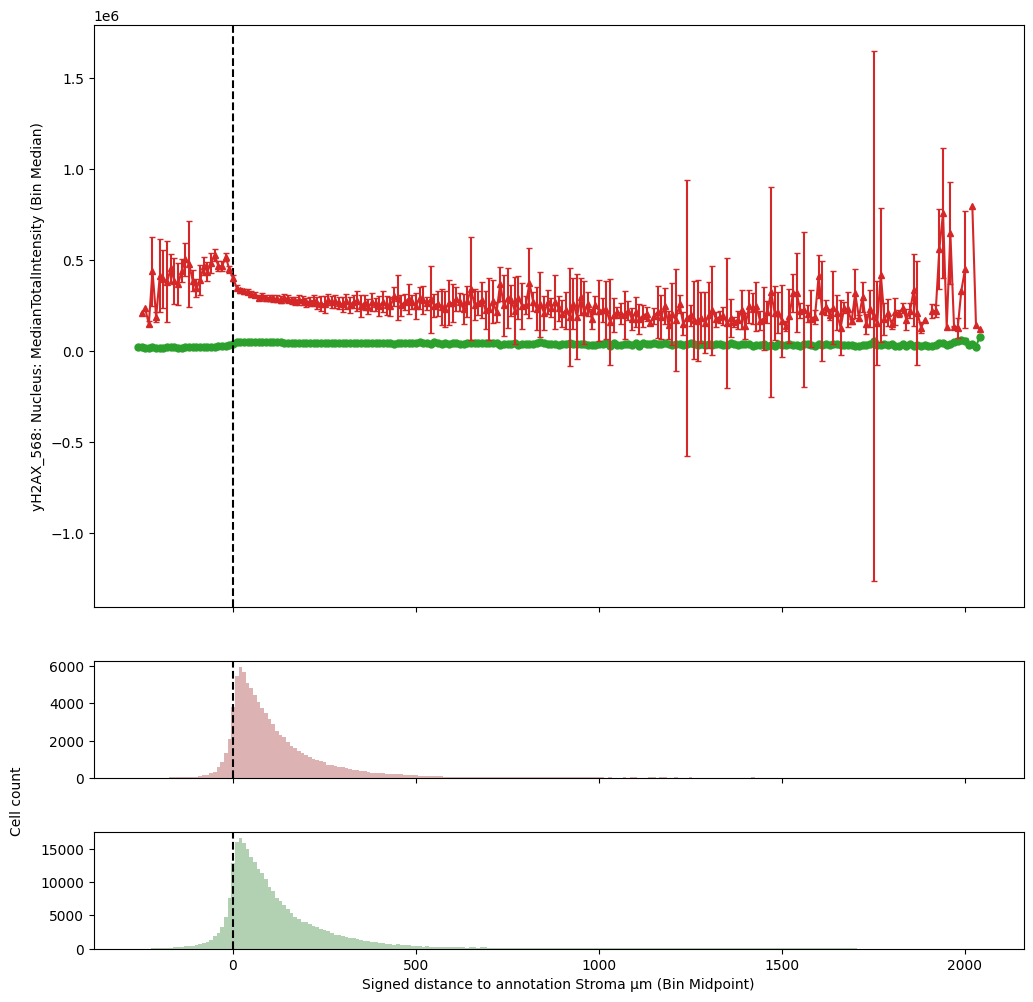

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = control_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_full_spatial_median_control.png", dpi=300)
plt.show()


### Means

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3885113980.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3885113980.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3885113980.py:13: FutureWarning: The default of observed=False is deprecated and will be chan

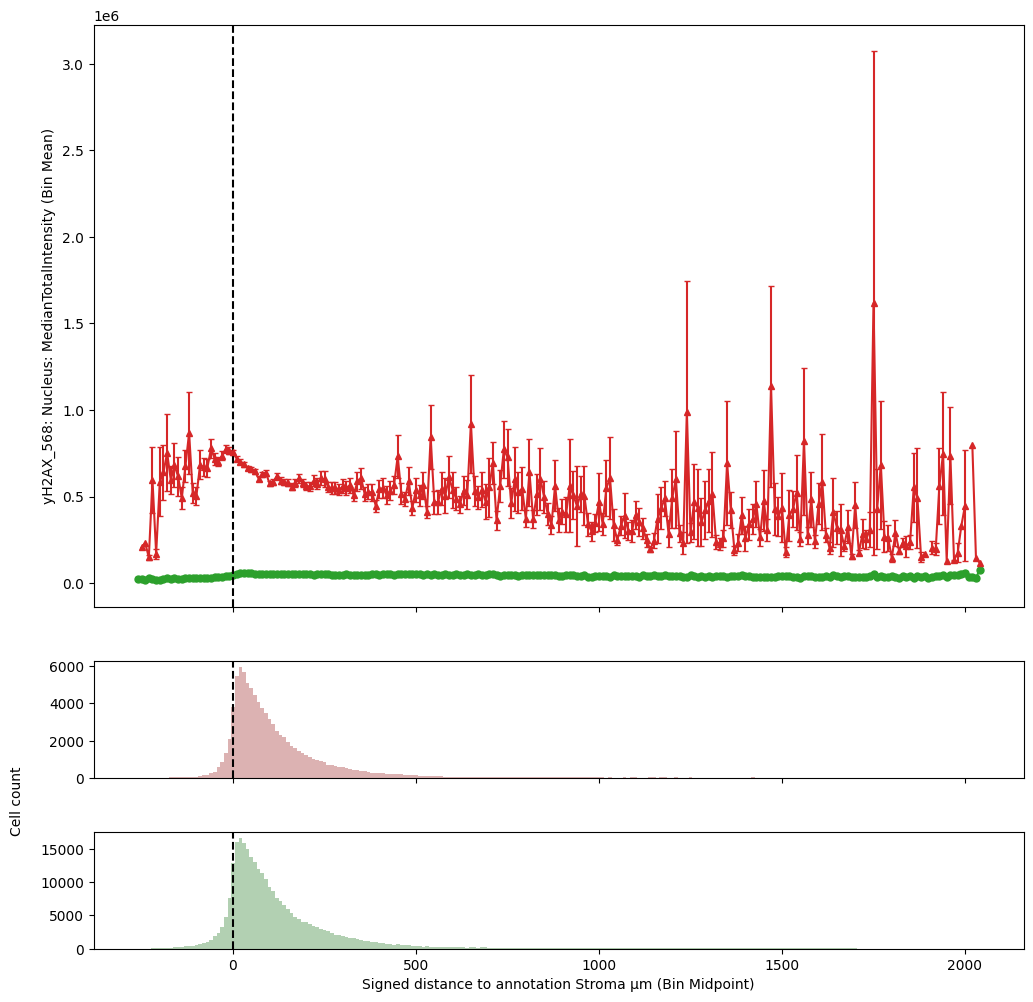

In [14]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = control_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_full_spatial_mean_control.png", dpi=300)
plt.show()


### Zoomed

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2077297113.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2077297113.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2077297113.py:14: FutureWarning: The default of observed=False is deprecated and will be ch

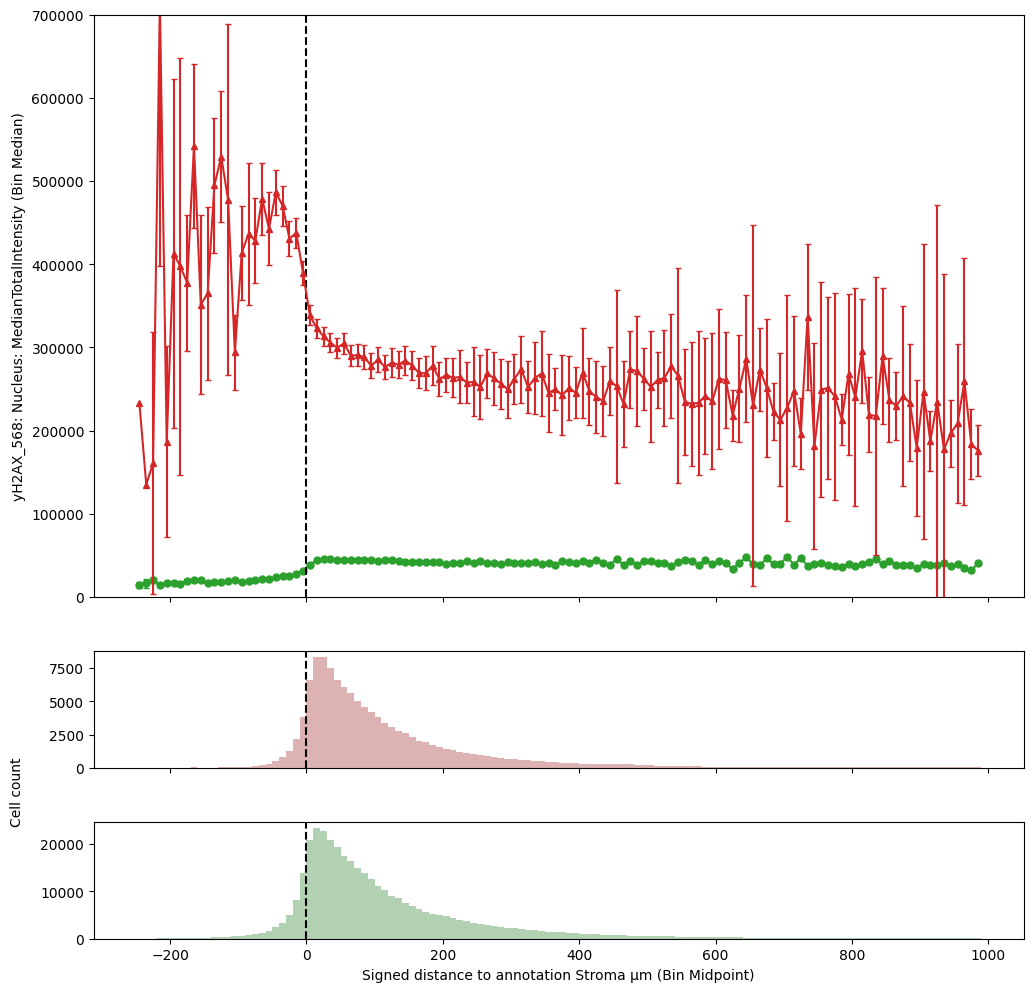

In [16]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 700000])

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = control_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

#ax1bis = ax1.twinx()
#ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')
#ax1.set_ylabel("Mean pNDRG1_647: Cell: MedianTotalIntensity")

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_zoomed_spatial_median_control.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2911839513.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2911839513.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2911839513.py:14: FutureWarning: The default of observed=False is deprecated and will be chan

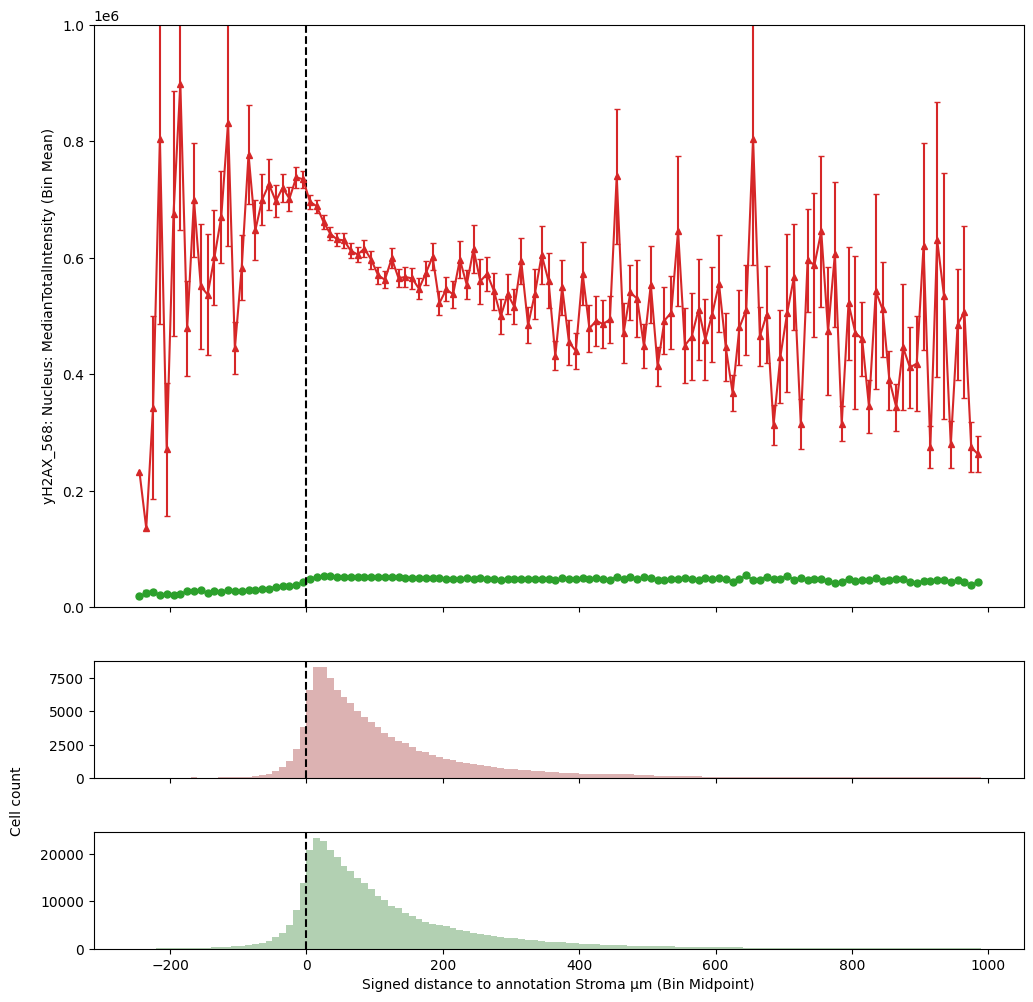

In [15]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = control_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

#ax1bis = ax1.twinx()
#ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')
#ax1.set_ylabel("Mean pNDRG1_647: Cell: MedianTotalIntensity")

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_zoomed_spatial_mean_control.png", dpi=300)
plt.show()


### Intensity difference plot

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/415919673.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/415919673.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/415919673.py:17: FutureWarning: The default of observed=False is deprecated and will be chan

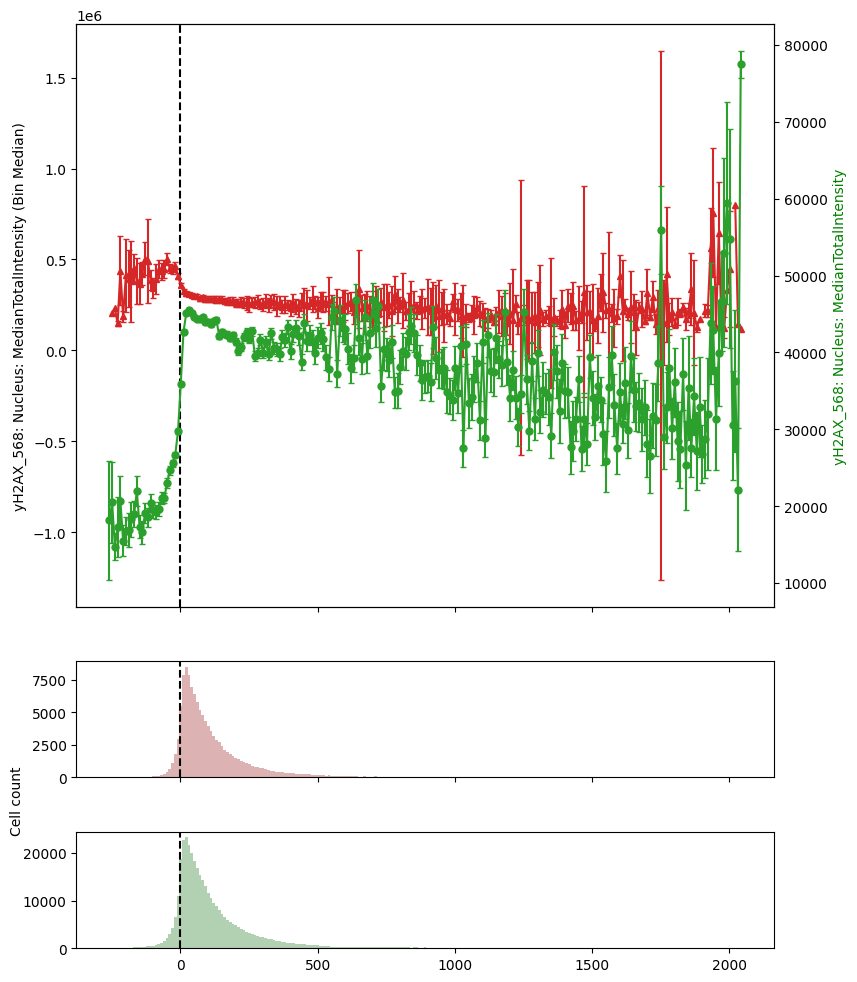

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = control_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = control_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

ax1bis = ax1.twinx()
ax1bis.set_ylabel("yH2AX_568: Nucleus: MedianTotalIntensity", color='green')

# Plotting the second set of data
color = 'tab:green'
ax1bis.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/full_scaled_spatial_median_control.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_39207/1054453228.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['KI67_647: Nucleus: Median'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_39207/1054453228.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['KI67_647: Nucleus: Median'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_39207/1054453228.py:24: FutureWarning: The default of observed=False is deprecated and wi

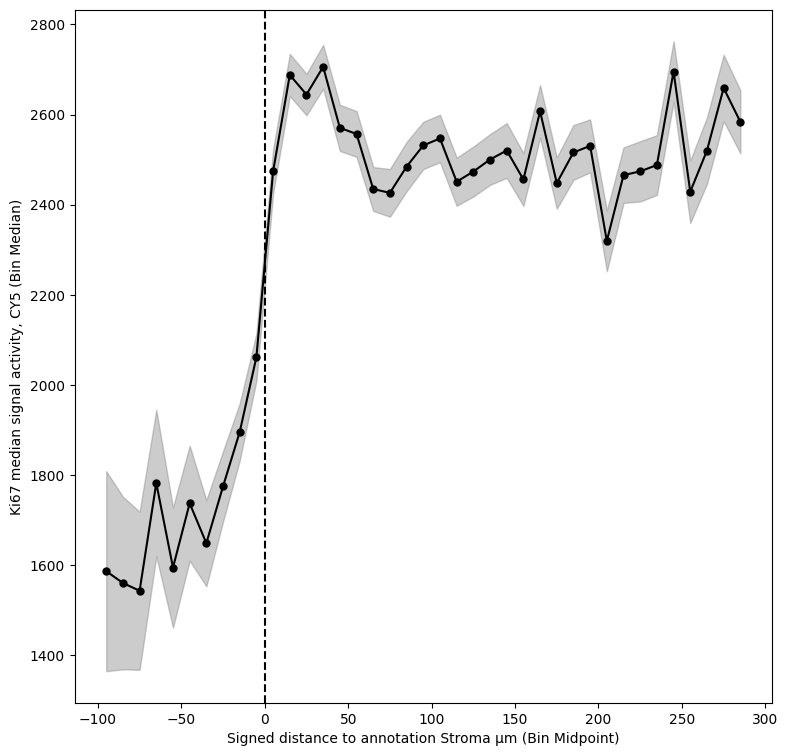

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -100 # int(np.min(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = 300 # int(np.max(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['KI67_647: Nucleus: Median'].median()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['KI67_647: Nucleus: Median'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['KI67_647: Nucleus: Median'].median()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['KI67_647: Nucleus: Median'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))

ax1.set_ylabel(r'Ki67 median signal activity, CY5 (Bin Median)', color='black')
ax1.axvline(x=0, ls='--', color='black')
#ax1.set_ylim([0, 1000000])

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='grey', alpha=0.4)

# Plot the difference line with error bars
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/full_difference_spatial_mean_control.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/896503714.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/896503714.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/896503714.py:24: FutureWarning: The default of observed=F

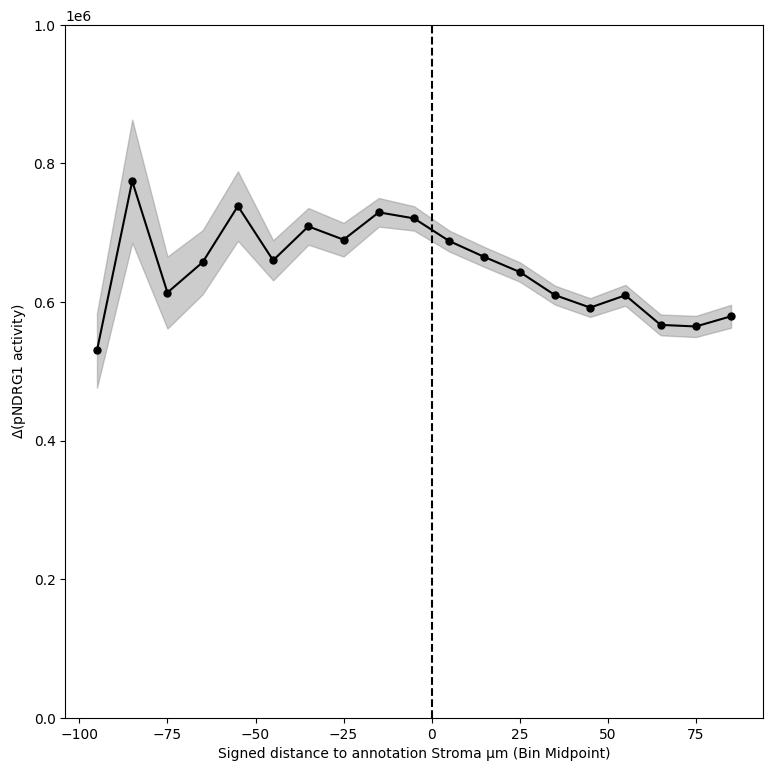

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -100
max_dist = 100
distance_bins_1 = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = control_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(control_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = control_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))

ax1.set_ylabel(r'$\Delta$(pNDRG1 activity)', color='black')
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='grey', alpha=0.4)

# Plot the difference line with error bars
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/zoomed_difference_spatial_mean_control.png", dpi=300)
plt.show()


## KO cells

### Medians

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2568016131.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2568016131.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2568016131.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to 

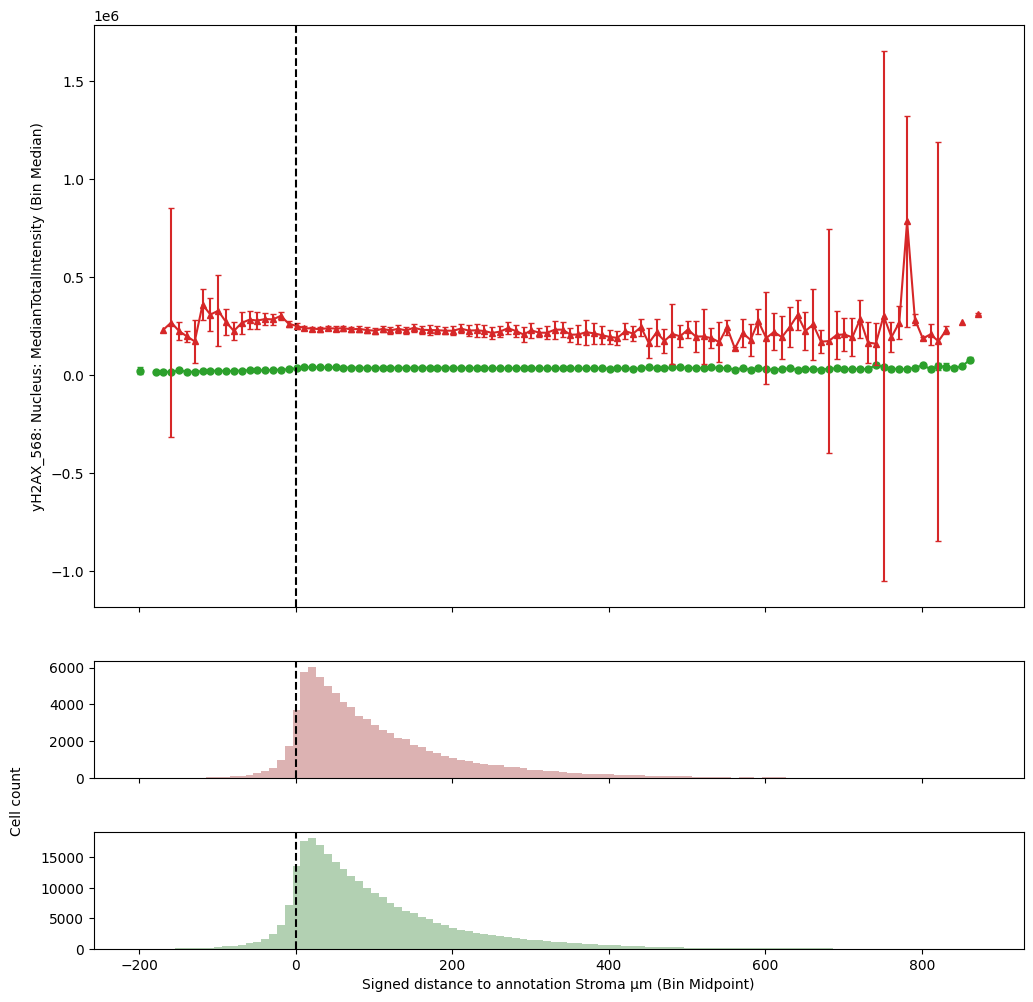

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_full_spatial_median_ko.png", dpi=300)
plt.show()


### Means

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1911718321.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1911718321.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1911718321.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

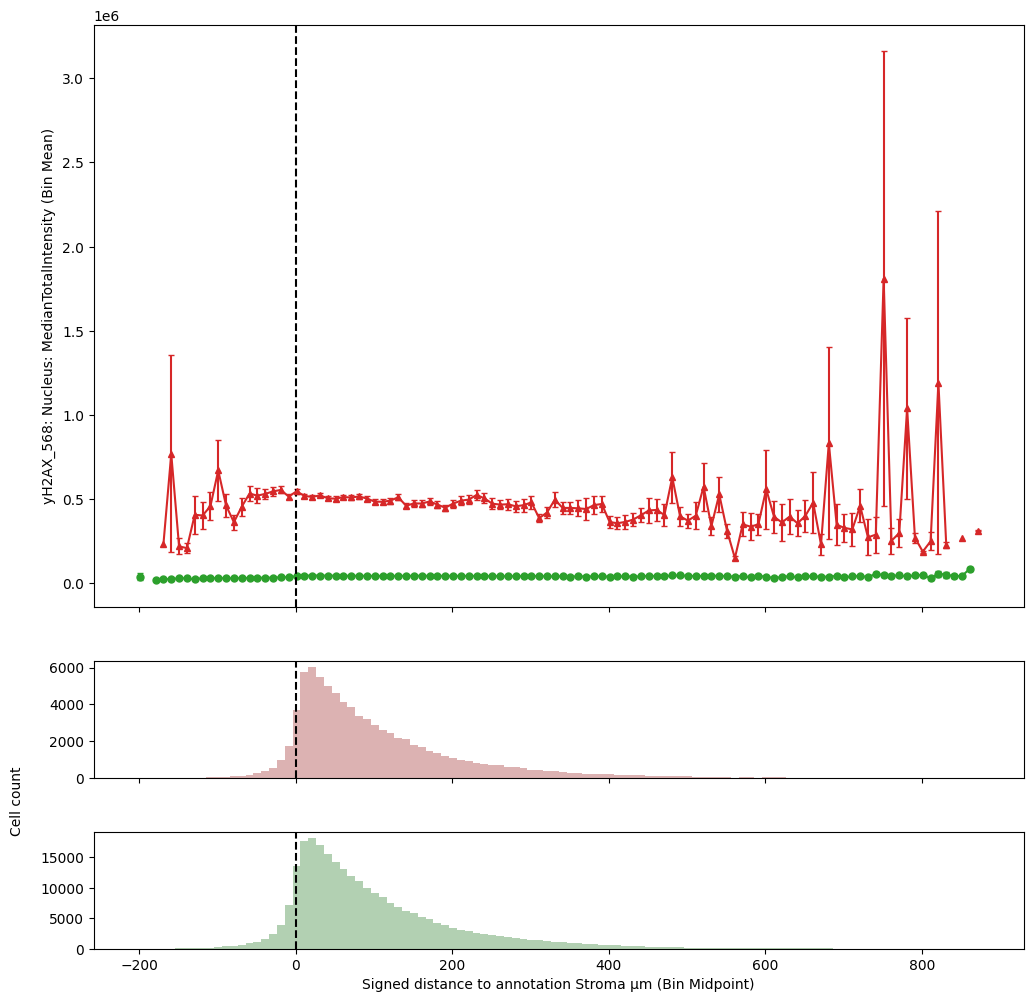

In [33]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_full_spatial_mean_ko.png", dpi=300)
plt.show()


### Zoomed

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/265288993.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/265288993.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/265288993.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True

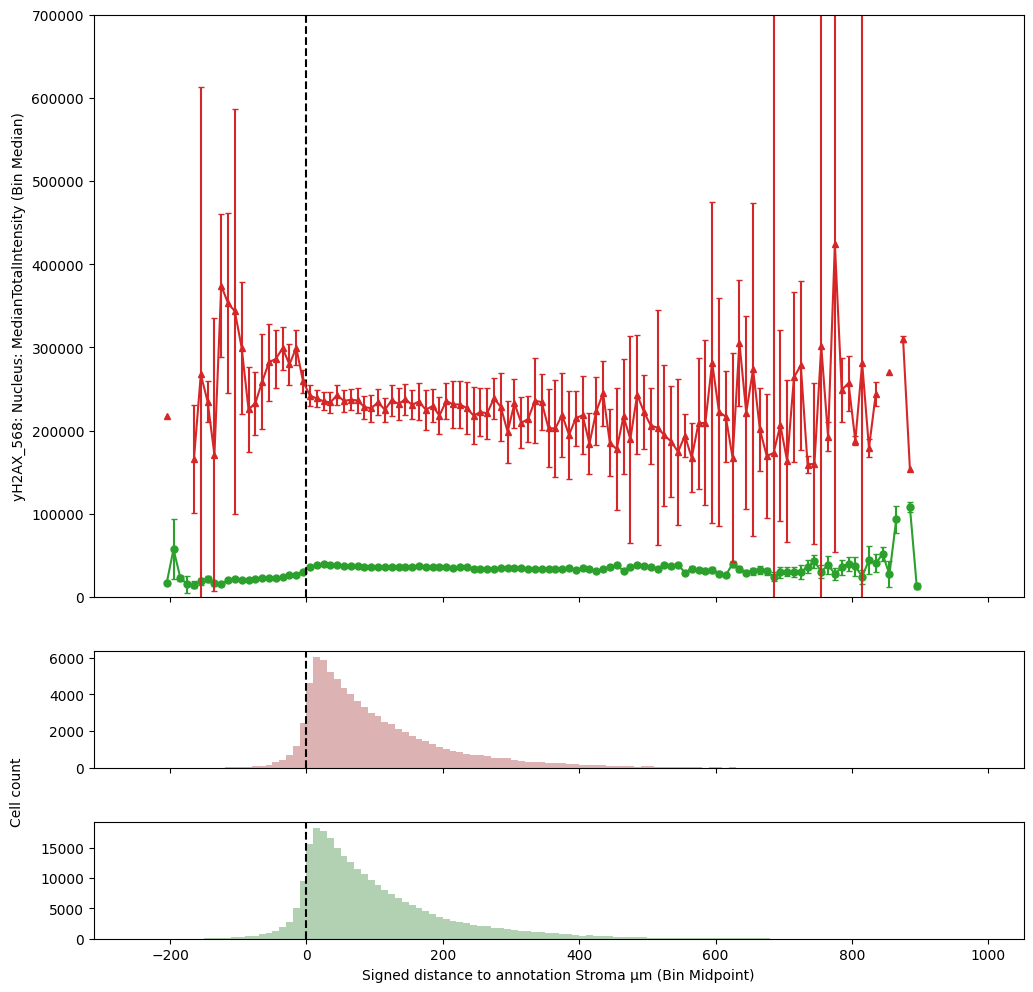

In [26]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 700000])

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

#ax1bis = ax1.twinx()
#ax1bis.set_ylabel("pNDRG1_647: Cell: MedianTotalIntensity", color='green')
#ax1.set_ylabel("Mean pNDRG1_647: Cell: MedianTotalIntensity")

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_zoomed_spatial_median_ko.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/4272350744.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/4272350744.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/4272350744.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

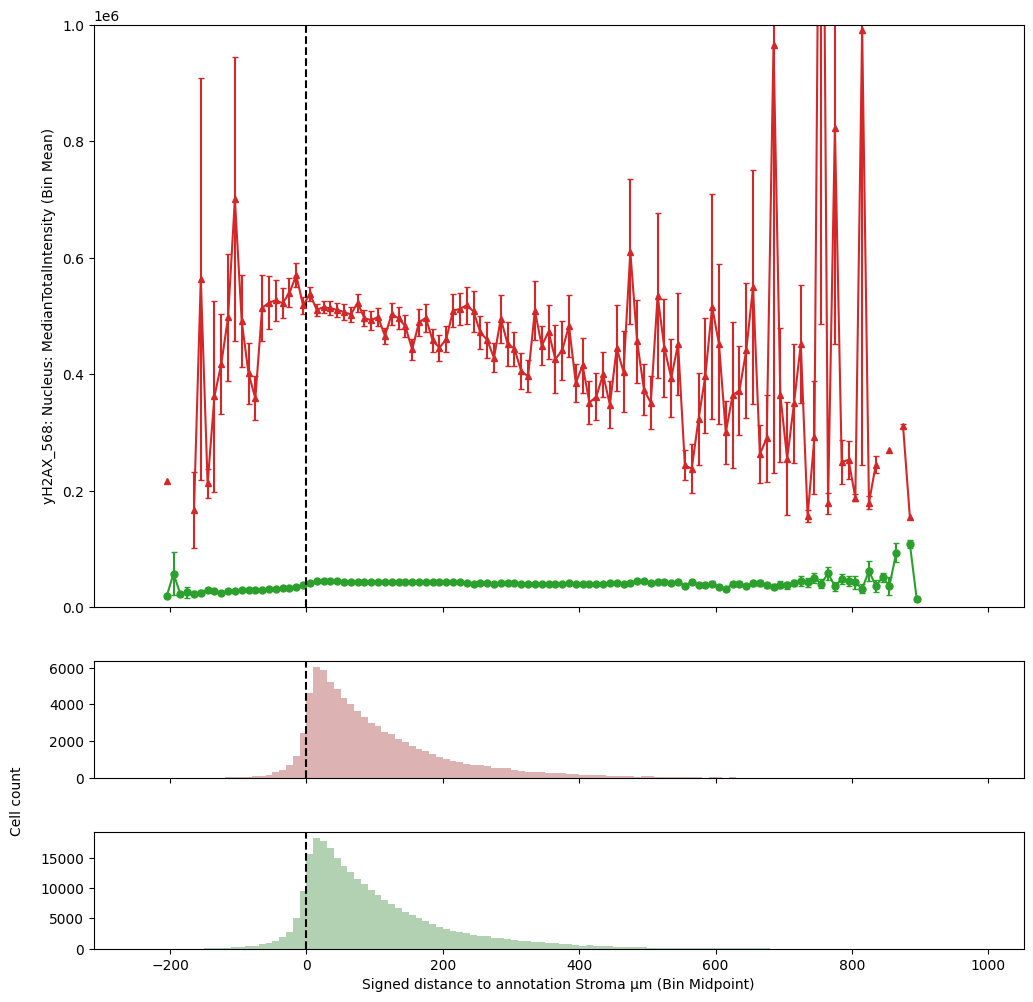

In [45]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/20240327_zoomed_spatial_mean_ko.png", dpi=300)
plt.show()


### Intensity differences

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1607561921.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1607561921.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/1607561921.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

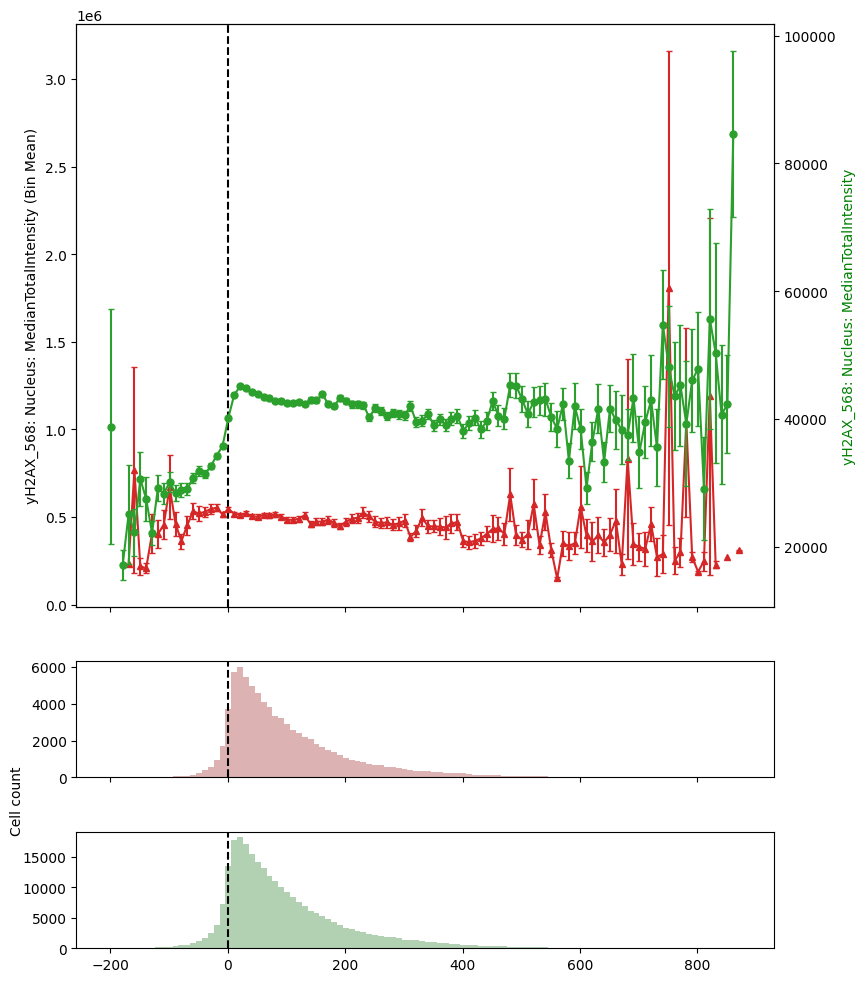

In [31]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

ax1bis = ax1.twinx()
ax1bis.set_ylabel("yH2AX_568: Nucleus: MedianTotalIntensity", color='green')

# Plotting the second set of data
color = 'tab:green'
ax1bis.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/full_scaled_spatial_mean_ko.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2472795464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2472795464.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/2472795464.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

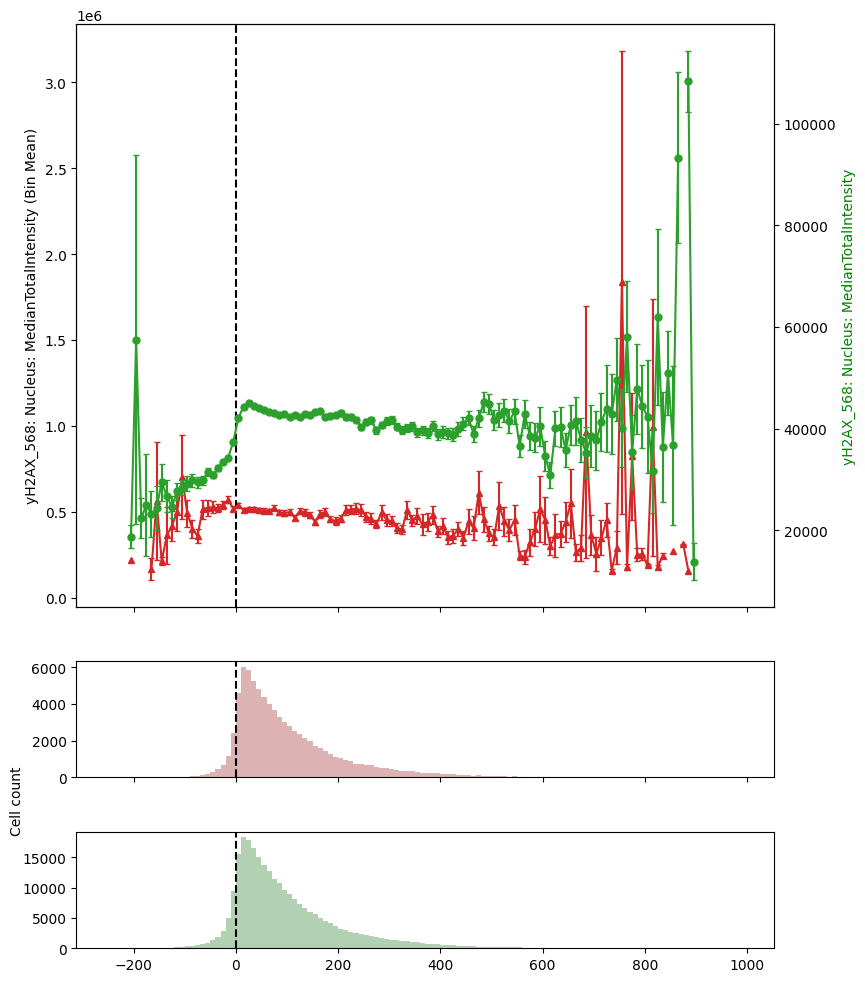

In [32]:
# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1).size()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_intensity_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2)
ax1.axvline(x=0, ls='--', color='black')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3)
ax2.axvline(x=0, ls='--', color='black')

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ko_ker488.groupby(distance_bins_2).size()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

ax1bis = ax1.twinx()
ax1bis.set_ylabel("yH2AX_568: Nucleus: MedianTotalIntensity", color='green')

# Plotting the second set of data
color = 'tab:green'
ax1bis.errorbar(bin_midpoints_2, median_intensity_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1)

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3)
ax3.axvline(x=0, ls='--', color='black')

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/zoomed_scaled_spatial_mean_ko.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/227703017.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/227703017.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_35091/227703017.py:24: FutureWarning: The default of observed=False is de

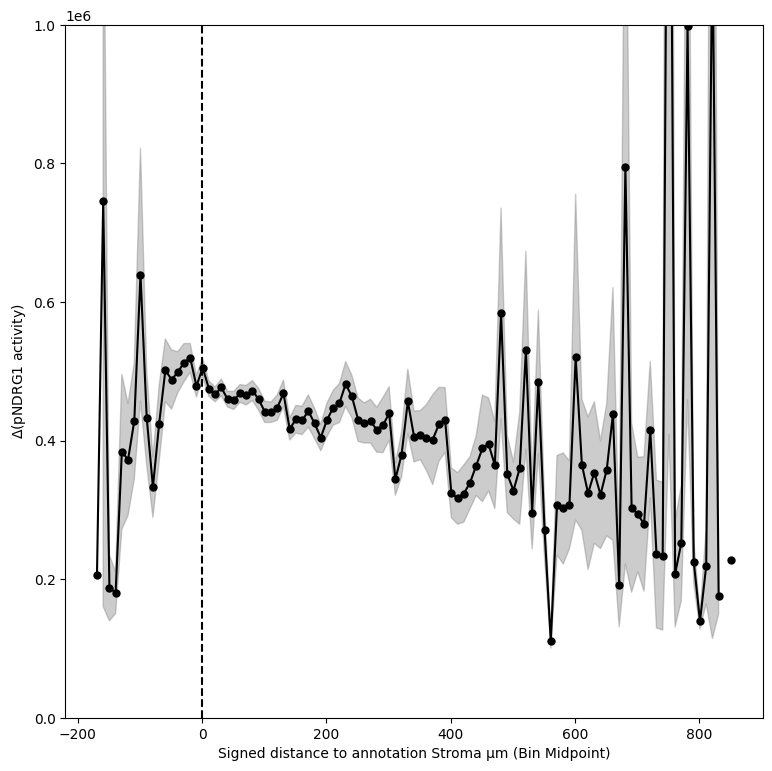

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate standard error for each distance bin for the first set of data
std_error_1 = ko_ker488_pndrg1_647.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].mean()

# Calculate standard error for each distance bin for the second set of data
std_error_2 = ko_ker488.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Calculate the difference between the two median intensities
diff_line = median_intensity_1.values - median_intensity_2.values

# Calculate the combined standard error
diff_std = np.sqrt(std_error_1**2 + std_error_2**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))

ax1.set_ylabel(r'$\Delta$(pNDRG1 activity)', color='black')
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1, diff_line - diff_std, diff_line + diff_std, color='grey', alpha=0.4)

# Plot the difference line with error bars
ax1.errorbar(bin_midpoints_1, diff_line, color='black', linestyle='-', marker='o', markersize=5, alpha=1)

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/full_difference_spatial_mean_ko.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3173596792.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3173596792.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3173596792.py:18: FutureWarning: T

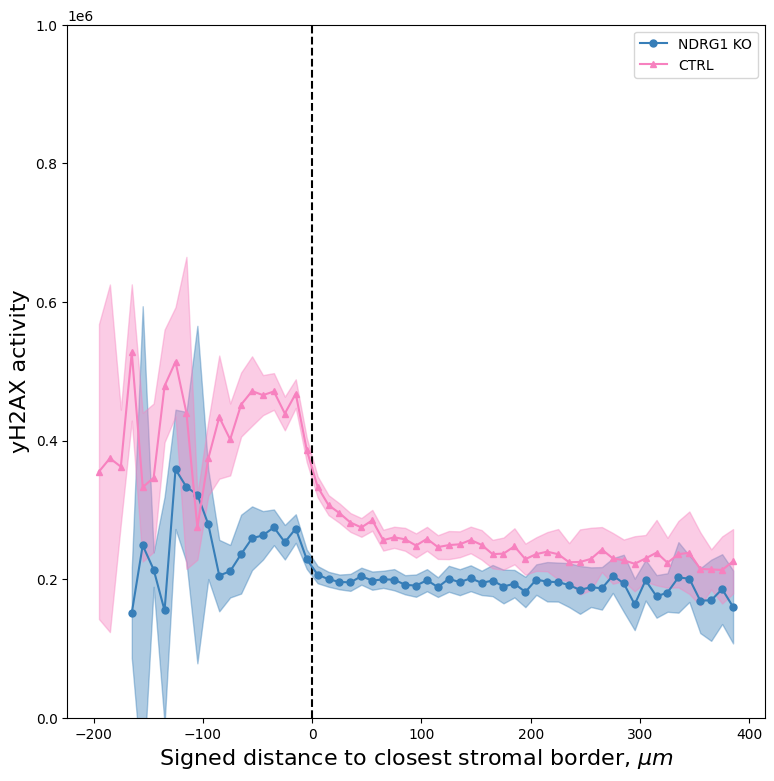

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -200
max_dist = 400

distance_bins_1_ko = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_1_ctl = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
median_intensity_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the first set of data
std_error_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
std_error_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1_ko = [(bin.left + bin.right) / 2 for bin in distance_bins_1_ko.cat.categories]
bin_midpoints_1_ctl = [(bin.left + bin.right) / 2 for bin in distance_bins_1_ctl.cat.categories]

distance_bins_1_ko = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_1_ctl = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Define bin size and create distance bins for the second set of data
distance_bins_2_ko = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_2_ctl = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2_ko = ko_ker488.groupby(distance_bins_2_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
median_intensity_2_ctl = ko_ker488.groupby(distance_bins_2_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the second set of data
std_error_2_ko = ko_ker488.groupby(distance_bins_2_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
std_error_2_ctl = ko_ker488.groupby(distance_bins_2_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2_ko = [(bin.left + bin.right) / 2 for bin in distance_bins_2_ko.cat.categories]
bin_midpoints_2_ctl = [(bin.left + bin.right) / 2 for bin in distance_bins_2_ctl.cat.categories]

# Calculate the difference between the two median intensities
diff_line_ko = median_intensity_1_ko.values - median_intensity_2_ko.values
diff_line_ctl = median_intensity_1_ctl.values - median_intensity_2_ctl.values

# Calculate the combined standard error
diff_std_ko = np.sqrt(std_error_1_ko**2 + std_error_2_ko**2)
diff_std_ctl = np.sqrt(std_error_1_ctl**2 + std_error_2_ctl**2)

# Plotting the difference line
fig, ax1 = plt.subplots(1, 1, figsize=(9, 9))

ax1.set_ylabel(r'yH2AX activity', color='black', fontsize=16)
ax1.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])

# Plot the gray surface representing uncertainty
ax1.fill_between(bin_midpoints_1_ko, diff_line_ko - diff_std_ko, diff_line_ko + diff_std_ko, color='#377eb8', alpha=0.4)
ax1.fill_between(bin_midpoints_1_ctl, diff_line_ctl - diff_std_ctl, diff_line_ctl + diff_std_ctl, color='#f781bf', alpha=0.4)

# Plot the difference line with error bars
ax1.errorbar(bin_midpoints_1_ko, diff_line_ko, color='#377eb8', linestyle='-', marker='o', markersize=5, alpha=1, label='NDRG1 KO')
ax1.errorbar(bin_midpoints_1_ctl, diff_line_ctl, color='#f781bf', linestyle='-', marker='^', markersize=5, alpha=1, label='CTRL')

plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=16)
plt.legend()
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/zoomed_difference_spatial_median_ko_ctl.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3230914693.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3230914693.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_intensity_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_88768/3230914693.py:18: FutureWarning: T

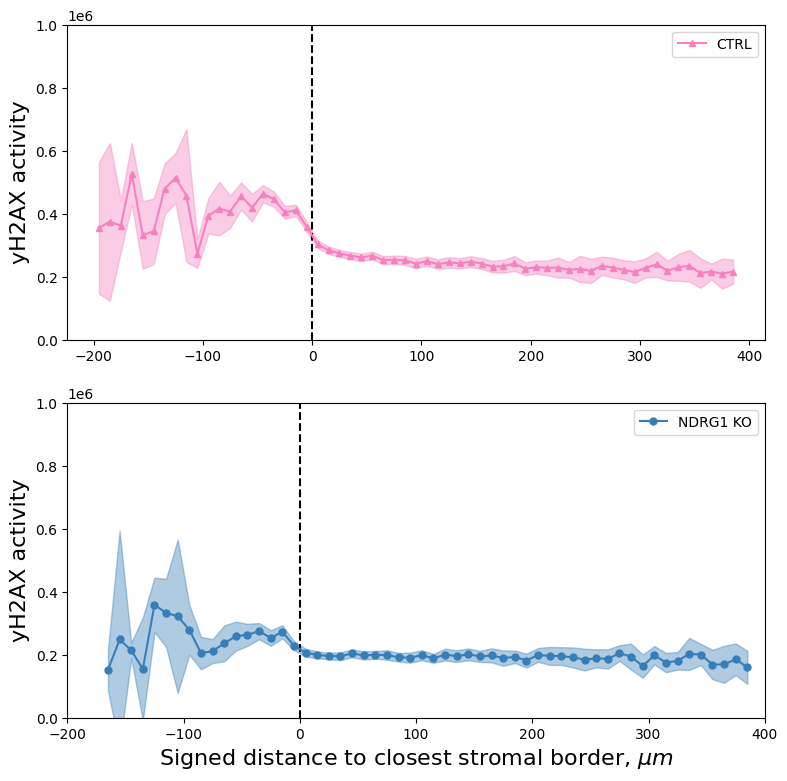

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -200
max_dist = 400

distance_bins_1_ko = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_1_ctl = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the first set of data
median_intensity_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
median_intensity_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the first set of data
std_error_1_ko = ko_ker488_pndrg1_647.groupby(distance_bins_1_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
std_error_1_ctl = control_ker488_pndrg1_647.groupby(distance_bins_1_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the first set of data
bin_midpoints_1_ko = [(bin.left + bin.right) / 2 for bin in distance_bins_1_ko.cat.categories]
bin_midpoints_1_ctl = [(bin.left + bin.right) / 2 for bin in distance_bins_1_ctl.cat.categories]

distance_bins_1_ko = pd.cut(ko_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_1_ctl = pd.cut(control_ker488_pndrg1_647['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Define bin size and create distance bins for the second set of data
distance_bins_2_ko = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)
distance_bins_2_ctl = pd.cut(ko_ker488['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Calculate median intensity for each distance bin for the second set of data
median_intensity_2_ko = ko_ker488.groupby(distance_bins_2_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()
median_intensity_2_ctl = ko_ker488.groupby(distance_bins_2_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].median()

# Calculate standard error for each distance bin for the second set of data
std_error_2_ko = ko_ker488.groupby(distance_bins_2_ko)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()
std_error_2_ctl = ko_ker488.groupby(distance_bins_2_ctl)['yH2AX_568: Nucleus: MedianTotalIntensity'].sem()

# Calculate bin midpoints for the second set of data
bin_midpoints_2_ko = [(bin.left + bin.right) / 2 for bin in distance_bins_2_ko.cat.categories]
bin_midpoints_2_ctl = [(bin.left + bin.right) / 2 for bin in distance_bins_2_ctl.cat.categories]

# Calculate the difference between the two median intensities
diff_line_ko = median_intensity_1_ko.values - median_intensity_2_ko.values
diff_line_ctl = median_intensity_1_ctl.values - median_intensity_2_ctl.values

# Calculate the combined standard error
diff_std_ko = np.sqrt(std_error_1_ko**2 + std_error_2_ko**2)
diff_std_ctl = np.sqrt(std_error_1_ctl**2 + std_error_2_ctl**2)

diff_std_ko = std_error_1_ko
diff_std_ctl = std_error_1_ctl

# Plotting the difference line
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))

ax1.set_ylabel(r'yH2AX activity', color='black', fontsize=16)
ax2.set_ylabel(r'yH2AX activity', color='black', fontsize=16)
ax1.axvline(x=0, ls='--', color='black')
ax2.axvline(x=0, ls='--', color='black')
ax1.set_ylim([0, 1000000])
ax2.set_ylim([0, 1000000])
ax1.set_xlim([-200, 400])
ax2.set_xlim([-200, 400])

# Plot the gray surface representing uncertainty
ax2.fill_between(bin_midpoints_1_ko, diff_line_ko - diff_std_ko, diff_line_ko + diff_std_ko, color='#377eb8', alpha=0.4)
#ax1.fill_between(bin_midpoints_2_ko, median_intensity_2_ko.values - std_error_2_ko, median_intensity_2_ko.values + std_error_2_ko, color='#377eb8', alpha=0.8)
ax1.fill_between(bin_midpoints_1_ctl, diff_line_ctl - diff_std_ctl, diff_line_ctl + diff_std_ctl, color='#f781bf', alpha=0.4)

# Plot the difference line with error bars
ax2.errorbar(bin_midpoints_1_ko, diff_line_ko, color='#377eb8', linestyle='-', marker='o', markersize=5, alpha=1, label='NDRG1 KO')
ax1.errorbar(bin_midpoints_1_ctl, diff_line_ctl, color='#f781bf', linestyle='-', marker='^', markersize=5, alpha=1, label='CTRL')

ax1.legend()
plt.xlabel(r'Signed distance to closest stromal border, $µm$', color='black', fontsize=16)
plt.legend()
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_yH2AX/Results/plots/spatial_analysis/zoomed_difference_spatial_median_ko_ctl_separated.png", dpi=300)
plt.show()


## Bootstrap medians and standard errors of the means

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_57022/1354020416.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].apply(bootstrap_mean)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_57022/1354020416.py:30: FutureWarning: The default of observed=False is deprecated and will

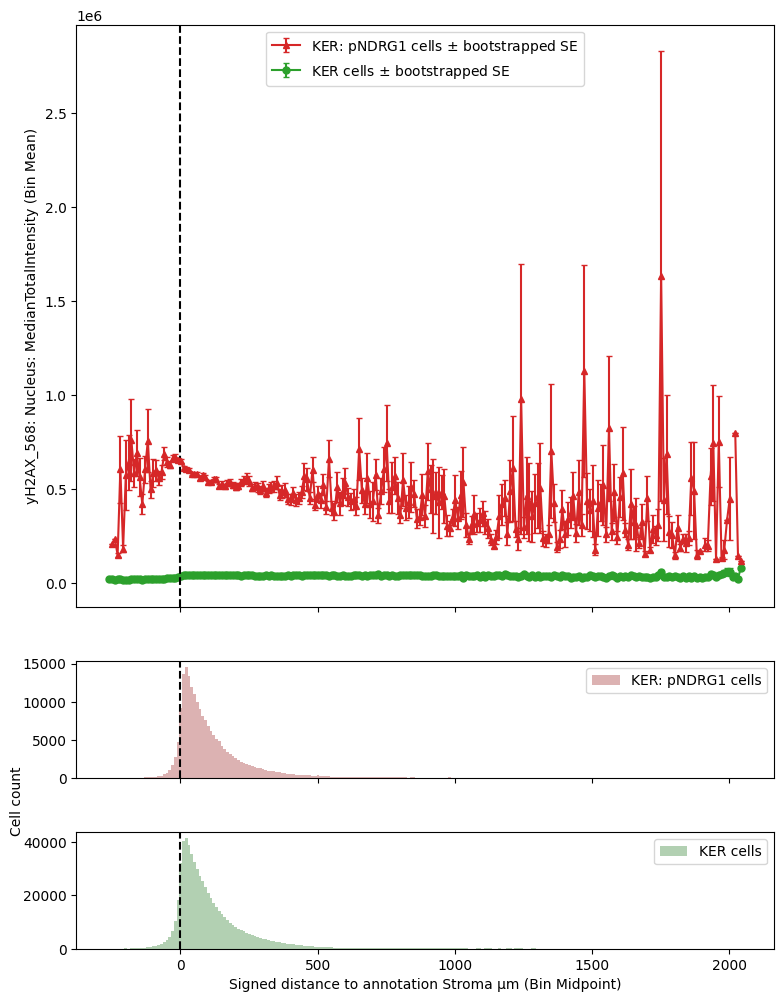

In [32]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))
ax1.axvline(x=0, ls='--', color='black')
ax2.axvline(x=0, ls='--', color='black')
ax3.axvline(x=0, ls='--', color='black')

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 500])

#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_full_spatial_median.png", dpi=300)
plt.show()


## Zoomed

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/201997013.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/201997013.py:23: FutureWarning: The default of observed=False is deprecated and will be 

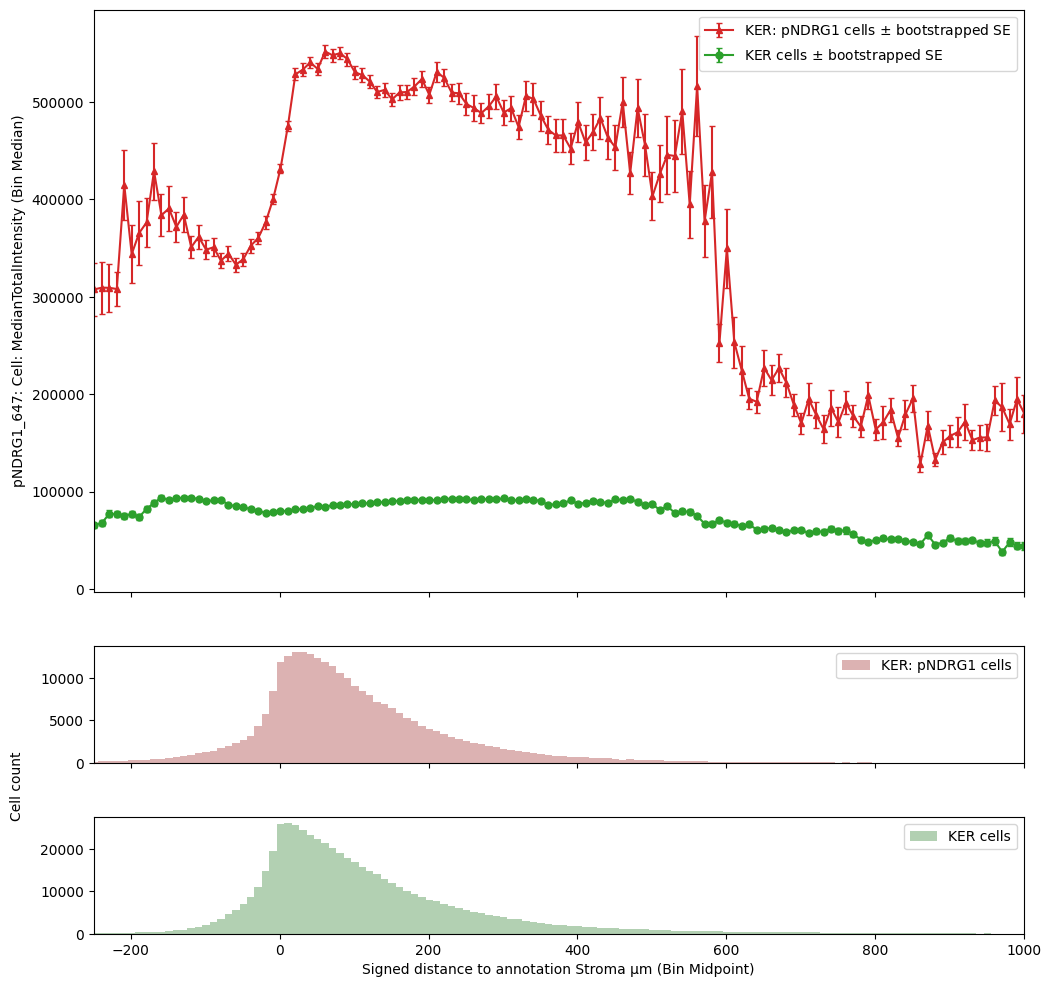

In [85]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['yH2AX_568: Nucleus: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(12, 12))

color = 'tab:red'
ax1.set_ylabel('yH2AX_568: Nucleus: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['yH2AX_568: Nucleus: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.xlim([-250, 1000])

plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321_zoomed_spatial_mean.png", dpi=300)
plt.show()


## Curve fitting using pySR

## PySR without SEM as weights

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/809059387.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/809059387.py:30: FutureWarning: The default of observed=False is deprecated and w


Expressions evaluated per second: 6.300e+05
Head worker occupation: 9.7%
Progress: 1348 / 1500 total iterations (89.867%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.349e+10  1.594e+01  y = 3.6426e+05
5           3.411e+09  4.824e-01  y = (6.097e+05 + (-490.91 * x₀))
7           3.178e+09  3.531e-02  y = (5.236e+05 + (-0.47807 * (x₀ * x₀)))
9           3.014e+09  2.663e-02  y = ((6.2214e+05 + (-508.47 * x₀)) / exp(inv(x₀)))
10          2.965e+09  1.635e-02  y = ((6.4465e+05 + (-539.35 * x₀)) / exp(1.5703 / x₀))
11          2.783e+09  6.312e-02  y = ((6.4465e+05 + (-539.35 * x₀)) / ((x₀ + 3.6436) / x₀))
13          2.779e+09  8.596e-04  y = ((6.4465e+05 + (-539.35 * x₀)) / ((x₀ + 3.6436) / (x₀ + 0....
                                  2372)))
15          2.778e+09  7.168e-05  y = (((6.4465e+05 + -539.35) + (-539.35 * x₀)) / ((x₀ + 3.6436...
                     

[ Info: Started!


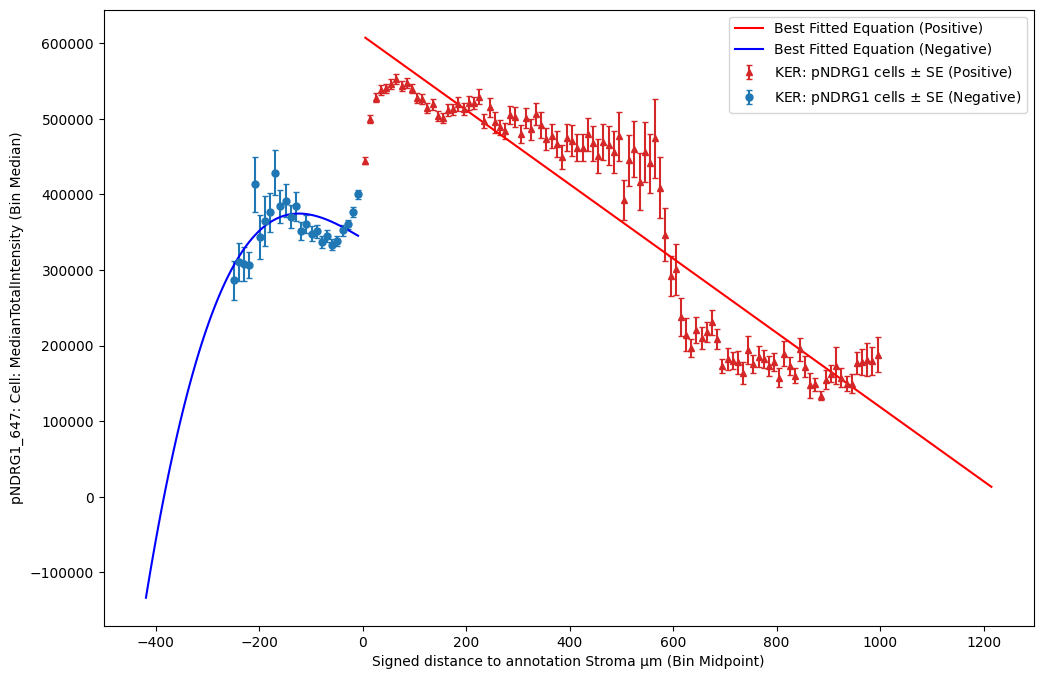

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0) & (ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 1000)]
negative_data = ker488_pndrg1_647_data[(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0) & (ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > -250)]

# Define bin size for both subsets
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))

# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from X and y for both subsets
X_filtered_positive = np.array(bin_midpoints_positive)[~np.isnan(median_values_positive)].reshape(-1, 1)
y_filtered_positive = median_values_positive[~median_values_positive.isna()].values

X_filtered_negative = np.array(bin_midpoints_negative)[~np.isnan(median_values_negative)].reshape(-1, 1)
y_filtered_negative = median_values_negative[~median_values_negative.isna()].values

# Fit the model for positive and negative subsets separately
model_positive = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=4
)

model_negative = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=4
)

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive)
model_negative.fit(X_filtered_negative, y_filtered_negative)

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Positive)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Negative)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Positive)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Negative)', color='blue')

# Add labels and legend
plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Show plot
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/20240222_plots/20240307_pySRfit_not_weighted_spatial.png", dpi=300)
plt.show()


## PySR with SEM as weights

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/28398388.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/28398388.py:30: FutureWarning: The default of observed=False is deprecated and wil


Expressions evaluated per second: 5.930e+05
Head worker occupation: 7.2%
Progress: 1080 / 3000 total iterations (36.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.520e+09  1.594e+01  y = 3.0921e+05
4           6.520e+09  2.782e-07  y = (3.0921e+05 + cos(x₀))
5           1.596e+09  1.407e+00  y = (3.7467e+05 + (-263.64 * x₀))
7           9.969e+08  2.354e-01  y = (3.5164e+05 + (x₀ * (-0.32024 * x₀)))
8           9.969e+08  -0.000e+00  y = (3.5164e+05 + ((x₀ * x₀) * sin(-0.32599)))
9           3.992e+08  9.152e-01  y = (-4.7996e+05 * cos(4.6015e+06 * cos(x₀ / 2.1486e+06)))
10          3.946e+08  1.160e-02  y = (-4.7996e+05 * cos(4.7373e+06 / inv(cos(x₀ / 2.1486e+06)))...
                                  )
11          3.830e+08  2.985e-02  y = (-4.7996e+05 * (cos(4.6031e+06 * cos(x₀ / 2.1486e+06)) + 0...
                                  .011758))
12          

/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/pysr/sr.py:1297: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.130e+05
Head worker occupation: 10.3%
Progress: 1189 / 3000 total iterations (39.633%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.087e+08  1.594e+01  y = 2.2276e+05
3           2.081e+08  1.465e-03  y = (2.2283e+05 + x₀)
5           1.850e+08  5.872e-02  y = (2.2792e+05 + (x₀ * 77.002))
7           1.603e+08  7.173e-02  y = (2.269e+05 + (x₀ * (-0.48858 * x₀)))
8           1.256e+08  2.443e-01  y = (2.2592e+05 + (x₀ / exp(0.021944 * x₀)))
9           1.255e+08  5.168e-05  y = (2.2592e+05 + (x₀ / sin(exp(0.021944 * x₀))))
10          1.255e+08  4.894e-04  y = (2.2592e+05 + (x₀ / exp(0.021944 * (x₀ + 1.055))))
11          1.253e+08  1.553e-03  y = (2.2592e+05 + (x₀ / exp(0.02175 * (x₀ + sin(x₀)))))
12          1.183e+08  5.702e-02  y = ((2.2381e+05 + (-32.837 * x₀)) + (x₀ / exp(0.022526 * x₀))...
                               

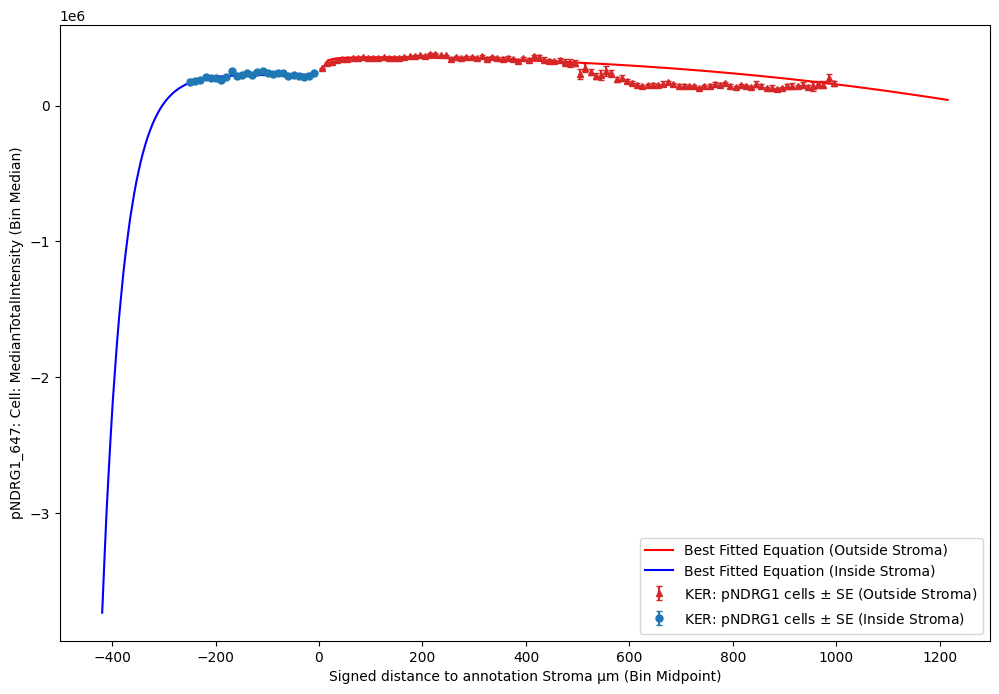

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0) & (ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 1000)]
negative_data = ker488_pndrg1_647_data[(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0) & (ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > -250)]

# Define bin size for both subsets
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))

# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from median values and standard errors for both subsets
valid_indices_positive = ~np.isnan(median_values_positive)
X_filtered_positive = np.array(bin_midpoints_positive)[valid_indices_positive].reshape(-1, 1)
y_filtered_positive = median_values_positive[valid_indices_positive].values
std_error_positive_filtered = std_error_positive[valid_indices_positive]
std_error_positive_filtered_values = np.where(std_error_positive_filtered.values == 0, 500000, std_error_positive_filtered.values)

valid_indices_negative = ~np.isnan(median_values_negative)
X_filtered_negative = np.array(bin_midpoints_negative)[valid_indices_negative].reshape(-1, 1)
y_filtered_negative = median_values_negative[valid_indices_negative].values
std_error_negative_filtered = std_error_negative[valid_indices_negative]
std_error_negative_filtered_values = np.where(std_error_negative_filtered.values == 0, 500000, std_error_negative_filtered.values)


# Fit the models for both subsets using PySRRegressor with standard error as weights
model_positive = PySRRegressor(
    niterations=200,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=7
)

model_negative = PySRRegressor(
    niterations=200,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=7
)

# Calculate weights based on filtered standard errors
weights_positive = [1/w for w in std_error_positive_filtered_values**2]
weights_negative = [1/w for w in std_error_negative_filtered_values**2]

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive, weights=weights_positive) # , weights=1 / std_error_positive_filtered**2
model_negative.fit(X_filtered_negative, y_filtered_negative, weights=weights_negative) # , weights=1 / std_error_negative_filtered**2

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Outside Stroma)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Inside Stroma)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Outside Stroma)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Inside Stroma)', color='blue')

# Add labels and legend
plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Print the best equation for the positive subset
print("Best Equation (Positive):", model_positive.get_best())
# Print the best equation for the negative subset
print("Best Equation (Negative):", model_negative.get_best())

# Show plot
#plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/20240222_plots/20240229_pySRfit_weighted_spatial.png", dpi=500)
plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_8014/651779912.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_8014/651779912.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_801


Expressions evaluated per second: 7.300e+05
Head worker occupation: 7.7%
Progress: 1846 / 3000 total iterations (61.533%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           5.397e+08  1.594e+01  y = 2.0275e+05
4           5.397e+08  7.947e-07  y = (2.0275e+05 + inv(x₀))
5           9.339e+07  1.754e+00  y = (2.2318e+05 + (-136.99 * x₀))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/pysr/sr.py:1297: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.300e+05
Head worker occupation: 7.0%
Progress: 1897 / 3000 total iterations (63.233%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.082e+08  1.594e+01  y = 2.2394e+05
3           4.062e+08  2.490e-03  y = (2.24e+05 + x₀)
5           5.459e+07  1.003e+00  y = (2.442e+05 + (348.32 * x₀))
7           5.459e+07  -0.000e+00  y = ((2.5431e+05 + -10105) + (x₀ * 348.32))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.
Best Equation (Positive Subset): complexity                                               5
loss                                            93393370.0
score                                             1.754206
equation                   (223181.78 + (-136.99213 * x0))
sympy_format                      223181.78 - 136.99

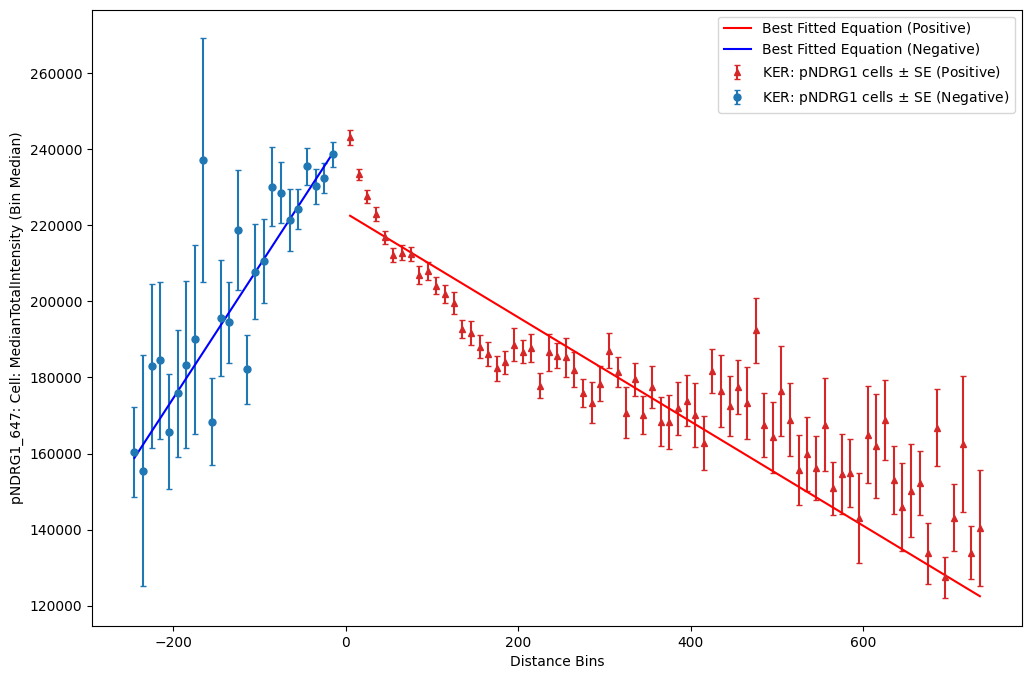

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0]
negative_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0]

# Define bin size for both subsets
bin_size = 10
min_dist = -250
max_dist = 750
# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from median values and standard errors for both subsets
valid_indices_positive = ~np.isnan(median_values_positive)
X_filtered_positive = np.array(bin_midpoints_positive)[valid_indices_positive].reshape(-1, 1)
y_filtered_positive = median_values_positive[valid_indices_positive].values
std_error_positive_filtered = std_error_positive[valid_indices_positive]
std_error_positive_filtered_values = np.where(std_error_positive_filtered.values == 0, 1000000, std_error_positive_filtered.values)

valid_indices_negative = ~np.isnan(median_values_negative)
X_filtered_negative = np.array(bin_midpoints_negative)[valid_indices_negative].reshape(-1, 1)
y_filtered_negative = median_values_negative[valid_indices_negative].values
std_error_negative_filtered = std_error_negative[valid_indices_negative]
std_error_negative_filtered_values = np.where(std_error_negative_filtered.values == 0, 1000000, std_error_negative_filtered.values)


# Fit the models for both subsets using PySRRegressor with standard error as weights
model_positive = PySRRegressor(
    niterations=200,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #weights=1 / std_error_positive.values**2
    #maxsize=10,
    maxdepth=3
)

model_negative = PySRRegressor(
    niterations=200,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #weights=1 / std_error_negative.values**2,
    #maxsize=10,
    maxdepth=3
)

'''sigma_pos = range(1, len(X_filtered_positive) + 1)
sigma_neg = [len(X_filtered_negative) - i + 1 for i in range(1, len(X_filtered_negative) + 1)]
print(sigma_neg)
print(sigma_pos)
weights_pos = [1/w**2 for w in sigma_pos]
weights_neg = [1/w**2 for w in sigma_neg]'''

# Calculate weights based on filtered standard errors
weights_positive = [1/w for w in std_error_positive_filtered_values**2]
weights_negative = [1/w for w in std_error_negative_filtered_values**2]
#print(weights_positive)
#print(weights_negative)

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive, weights=weights_positive) # , weights=1 / std_error_positive_filtered**2
model_negative.fit(X_filtered_negative, y_filtered_negative, weights=weights_negative) # , weights=1 / std_error_negative_filtered**2

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Positive)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Negative)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Positive)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Negative)', color='blue')

# Add labels and legend
plt.xlabel('Distance Bins')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Print the best equation for the positive subset
print("Best Equation (Positive Subset):", model_positive.get_best())
# Print the best equation for the negative subset
print("Best Equation (Negative Subset):", model_negative.get_best())

# Show plot
#plt.savefig()
plt.show()

## 20240307_data

In [24]:
os.chdir('/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/spatial_data/20240314_data')

# Specify the columns you want to load
columns_to_load = ['Class', 'pNDRG1_647: Cell: MedianTotalIntensity', 'Signed distance to annotation Stroma µm']

# Read and filter each CSV file
dfs_ker488_pndrg1_647 = []
dfs_ker488 = []
for i in range(1, 6):
    file_path = f'AsPC LZ #{i} GEM  Ker488 FN 568 pN 647 _01.vsi - 20x.csv'
    df = pd.read_csv(file_path, usecols=columns_to_load)
    df_ker488_pndrg1_647 = df[df['Class'] == 'KER_488: pNDRG1_647']  # Filter rows by 'Class' for KER_488: pNDRG1_647
    df_ker488 = df[df['Class'] == 'KER_488']  # Filter rows by 'Class' for KER_488
    dfs_ker488_pndrg1_647.append(df_ker488_pndrg1_647)
    dfs_ker488.append(df_ker488)

# Concatenate all filtered datasets
ker488_pndrg1_647_data = pd.concat(dfs_ker488_pndrg1_647, ignore_index=True)
ker488_data = pd.concat(dfs_ker488, ignore_index=True)


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/2356322478.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/2356322478.py:30: FutureWarning: The default of observed=False is deprecated and will b

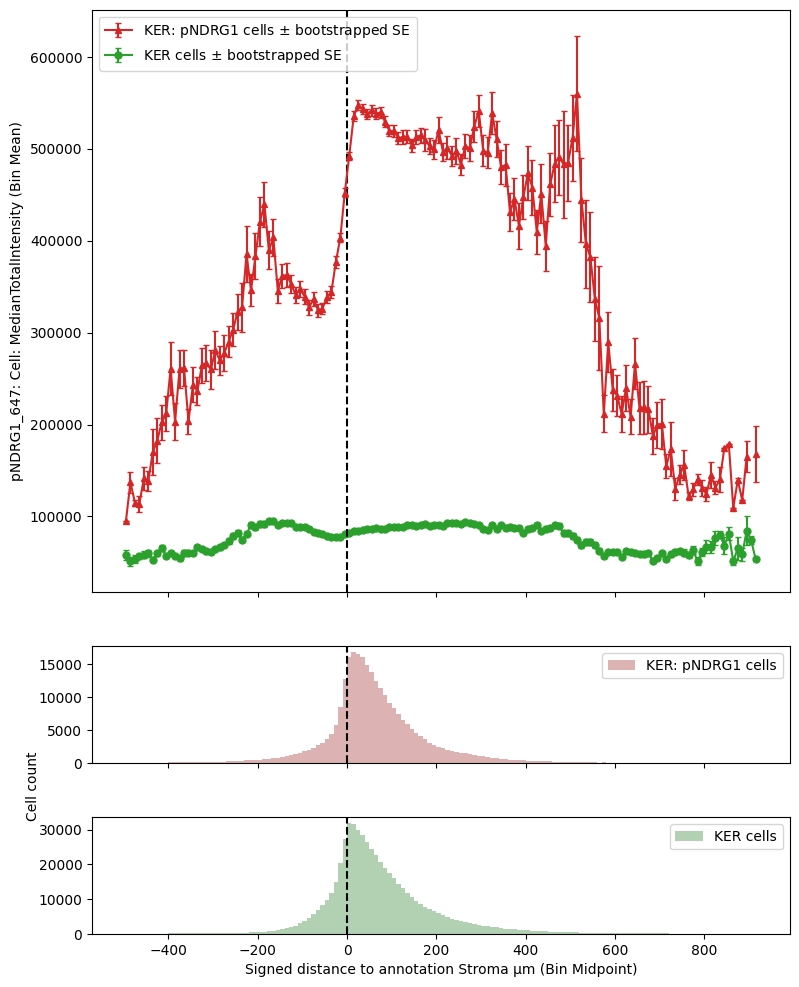

In [112]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))
ax1.axvline(x=0, ls='--', color='black')
ax2.axvline(x=0, ls='--', color='black')
ax3.axvline(x=0, ls='--', color='black')

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Mean)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_mean)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 500])

plt.savefig('/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321/full_spatial_SW1990_pNDRG1_mean.png', dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1611879812.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_89864/1611879812.py:30: FutureWarning: The default of observed=False is deprecated and will

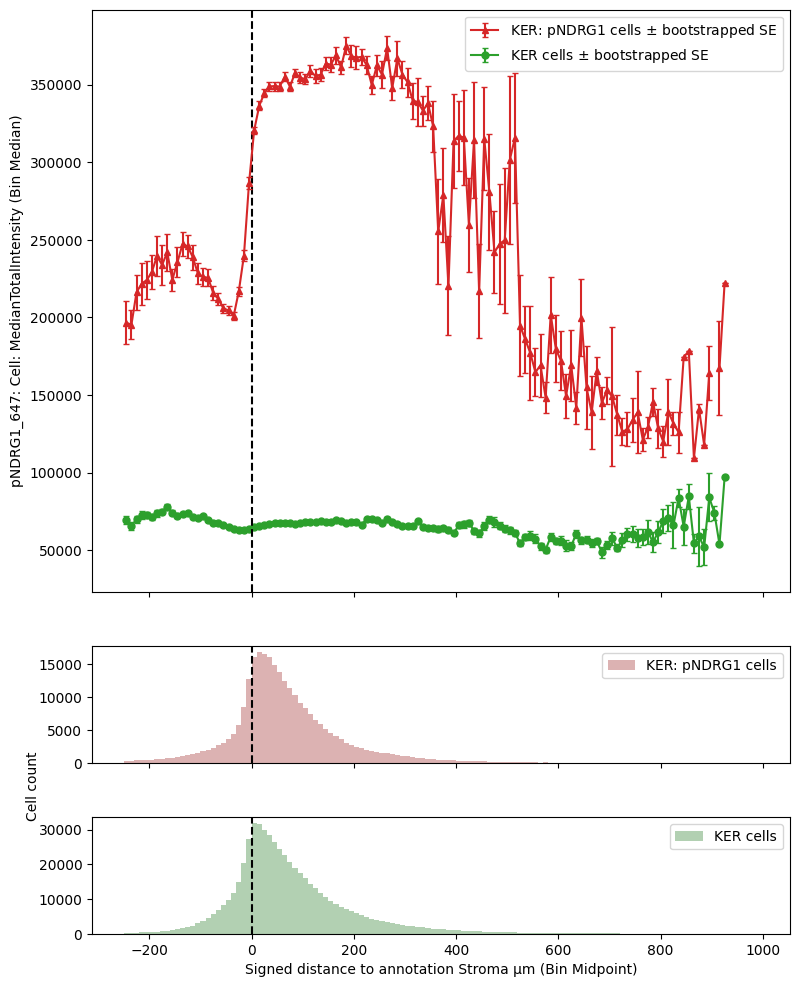

In [114]:
# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

def bootstrap_mean(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.mean(bootstrap_sample))
    return np.mean(medians), np.std(medians, ddof=1)

# Define bin size and create distance bins for the first set of data
bin_size = 10
min_dist = -250
max_dist = 1000
distance_bins_1 = pd.cut(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the first set of data
median_bootstrap_std_error_1 = ker488_pndrg1_647_data.groupby(distance_bins_1)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors
median_values_1 = median_bootstrap_std_error_1.apply(lambda x: x[0])
std_error_1 = median_bootstrap_std_error_1.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the first set of data
num_data_points_1 = ker488_pndrg1_647_data.groupby(distance_bins_1).size()

# Calculate bin midpoints for the first set of data
bin_midpoints_1 = [(bin.left + bin.right) / 2 for bin in distance_bins_1.cat.categories]

# Plotting the first set of data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(9, 12))
ax1.axvline(x=0, ls='--', color='black')
ax2.axvline(x=0, ls='--', color='black')
ax3.axvline(x=0, ls='--', color='black')

color = 'tab:red'
ax1.set_ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)', color='black')
ax1.errorbar(bin_midpoints_1, median_values_1.values, yerr=std_error_1, fmt='-^', markersize=5, color=color, ecolor=color, capsize=2, label=r'KER: pNDRG1 cells $\pm$ bootstrapped SE')

# Create another y-axis for the number of data points
ax2.set_ylabel('Cell count', color='black')
ax2.yaxis.set_label_coords(-0.075, -0.2)
ax2.bar(bin_midpoints_1, num_data_points_1.values, color='darkred', width=bin_size, align='center', alpha=0.3, label='KER: pNDRG1 cells')
ax2.legend()

# Define bin size and create distance bins for the second set of data
distance_bins_2 = pd.cut(ker488_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, max_dist, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for the second set of data
median_bootstrap_std_error_2 = ker488_data.groupby(distance_bins_2)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors
median_values_2 = median_bootstrap_std_error_2.apply(lambda x: x[0])
std_error_2 = median_bootstrap_std_error_2.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for the second set of data
num_data_points_2 = ker488_data.groupby(distance_bins_2).size()

# Calculate bin midpoints for the second set of data
bin_midpoints_2 = [(bin.left + bin.right) / 2 for bin in distance_bins_2.cat.categories]

# Plotting the second set of data
color = 'tab:green'
ax1.errorbar(bin_midpoints_2, median_values_2.values, yerr=std_error_2, fmt='-o', color=color, markersize=5, ecolor=color, capsize=2, zorder=1, label=r'KER cells $\pm$ bootstrapped SE')
ax1.legend()

ax3.bar(bin_midpoints_2, num_data_points_2.values, color='darkgreen', width=bin_size, align='center', alpha=0.3, label='KER cells')
ax3.legend()

plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
#plt.xlim([-250, 750])
#ax1.set_ylim([0, 300000])

plt.savefig('/Users/antoine/Harvard/IAC/NinaKozlova/20240119_SW1990_pNDRG1/Results/plots/spatial_analysis/20240321/zoomed_spatial_SW1990_pNDRG1_median.png', dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/713004444.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/713004444.py:30: FutureWarning: The default of observed=False is deprecated and w


Expressions evaluated per second: 5.280e+05
Head worker occupation: 12.1%
Progress: 1345 / 1500 total iterations (89.667%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.693e+09  1.594e+01  y = 1.5273e+05
4           1.693e+09  5.960e-08  y = (1.5273e+05 + inv(x₀))
5           3.364e+08  1.616e+00  y = (2.1618e+05 + (x₀ * -96.584))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/pysr/sr.py:1297: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


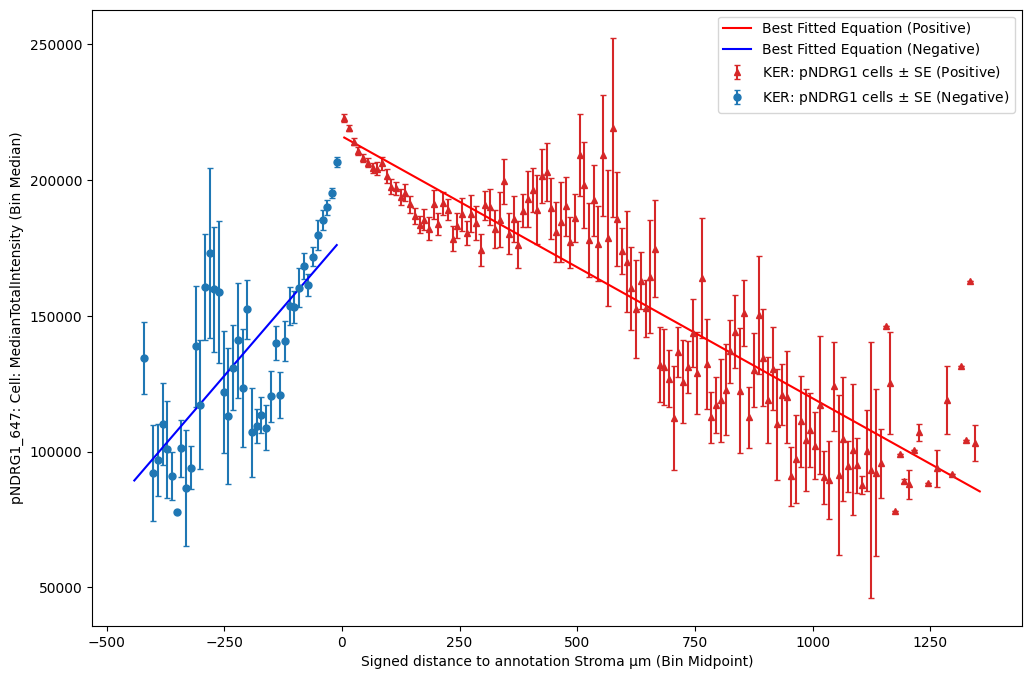

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0]
negative_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0]

# Define bin size for both subsets
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))

# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from X and y for both subsets
X_filtered_positive = np.array(bin_midpoints_positive)[~np.isnan(median_values_positive)].reshape(-1, 1)
y_filtered_positive = median_values_positive[~median_values_positive.isna()].values

X_filtered_negative = np.array(bin_midpoints_negative)[~np.isnan(median_values_negative)].reshape(-1, 1)
y_filtered_negative = median_values_negative[~median_values_negative.isna()].values

# Fit the model for positive and negative subsets separately
model_positive = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

model_negative = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive)
model_negative.fit(X_filtered_negative, y_filtered_negative)

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Positive)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Negative)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Positive)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Negative)', color='blue')

# Add labels and legend
plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Show plot
plt.savefig('/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/plots/spatial_analysis/20240314_plots/pySRfit_not_weighted_full_spatial_AScP_pNDRG1.png', dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/1475771218.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/1475771218.py:30: FutureWarning: The default of observed=False is deprecated and

Best Equation (Positive): complexity                                               5
loss                                            58161092.0
score                                             3.701508
equation                   (214521.16 + (-103.64824 * x0))
sympy_format                      214521.16 - 103.64824*x0
lambda_format    PySRFunction(X=>214521.16 - 103.64824*x0)
Name: 2, dtype: object
Best Equation (Negative): complexity                                               5
loss                                           182574020.0
score                                              0.83352
equation                    (200549.06 + (x0 * 341.49066))
sympy_format                      341.49066*x0 + 200549.06
lambda_format    PySRFunction(X=>341.49066*x0 + 200549.06)
Name: 2, dtype: object


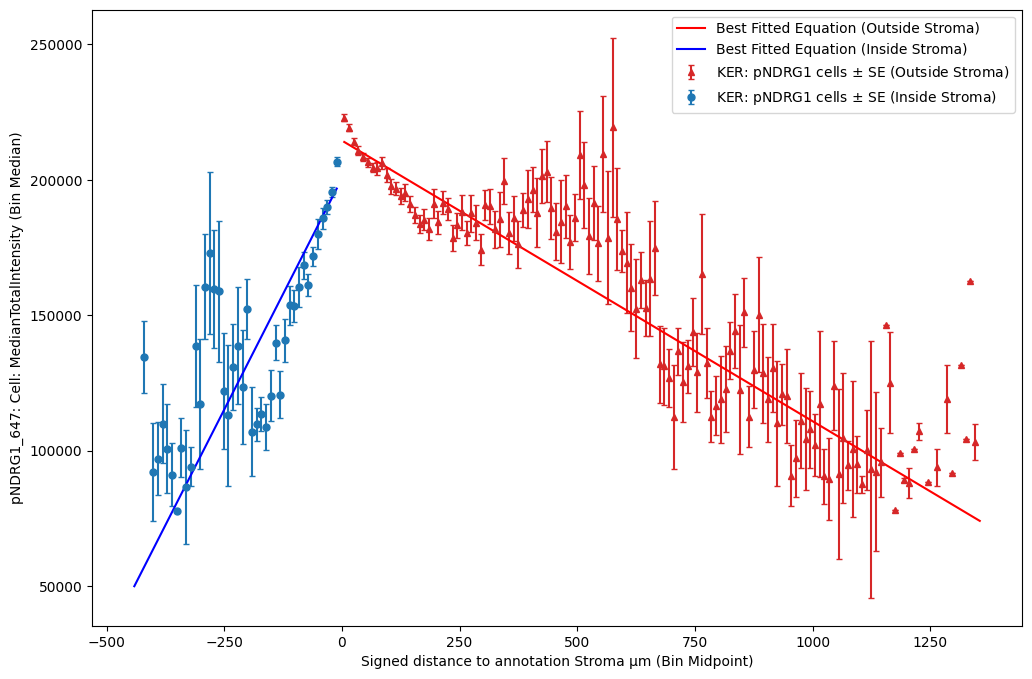

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0]
negative_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0]

# Define bin size for both subsets
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))

# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from median values and standard errors for both subsets
valid_indices_positive = ~np.isnan(median_values_positive)
X_filtered_positive = np.array(bin_midpoints_positive)[valid_indices_positive].reshape(-1, 1)
y_filtered_positive = median_values_positive[valid_indices_positive].values
std_error_positive_filtered = std_error_positive[valid_indices_positive]
std_error_positive_filtered_values = np.where(std_error_positive_filtered.values == 0, 500000, std_error_positive_filtered.values)

valid_indices_negative = ~np.isnan(median_values_negative)
X_filtered_negative = np.array(bin_midpoints_negative)[valid_indices_negative].reshape(-1, 1)
y_filtered_negative = median_values_negative[valid_indices_negative].values
std_error_negative_filtered = std_error_negative[valid_indices_negative]
std_error_negative_filtered_values = np.where(std_error_negative_filtered.values == 0, 500000, std_error_negative_filtered.values)


# Fit the models for both subsets using PySRRegressor with standard error as weights
model_positive = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

model_negative = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

# Calculate weights based on filtered standard errors
weights_positive = [1/w for w in std_error_positive_filtered_values**2]
weights_negative = [1/w for w in std_error_negative_filtered_values**2]

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive, weights=weights_positive) # , weights=1 / std_error_positive_filtered**2
model_negative.fit(X_filtered_negative, y_filtered_negative, weights=weights_negative) # , weights=1 / std_error_negative_filtered**2

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Outside Stroma)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Inside Stroma)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Outside Stroma)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Inside Stroma)', color='blue')

# Add labels and legend
plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Print the best equation for the positive subset
print("Best Equation (Positive):", model_positive.get_best())
# Print the best equation for the negative subset
print("Best Equation (Negative):", model_negative.get_best())

# Show plot
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/plots/spatial_analysis/20240314_plots/pySRfit_weighted_by_error_full_spatial_AScP_pNDRG1.png", dpi=300)
plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/2513033964.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ninakozlova/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_76661/2513033964.py:30: FutureWarning: The default of observed=False is deprecated and

Best Equation (Positive): complexity                                              5
loss                                           47485316.0
score                                            1.436266
equation                   (215510.19 + (x0 * -105.6795))
sympy_format                      215510.19 - 105.6795*x0
lambda_format    PySRFunction(X=>215510.19 - 105.6795*x0)
Name: 2, dtype: object
Best Equation (Negative): complexity                                               5
loss                                            74571770.0
score                                             0.887005
equation                    ((439.55316 * x0) + 205986.25)
sympy_format                      439.55316*x0 + 205986.25
lambda_format    PySRFunction(X=>439.55316*x0 + 205986.25)
Name: 2, dtype: object


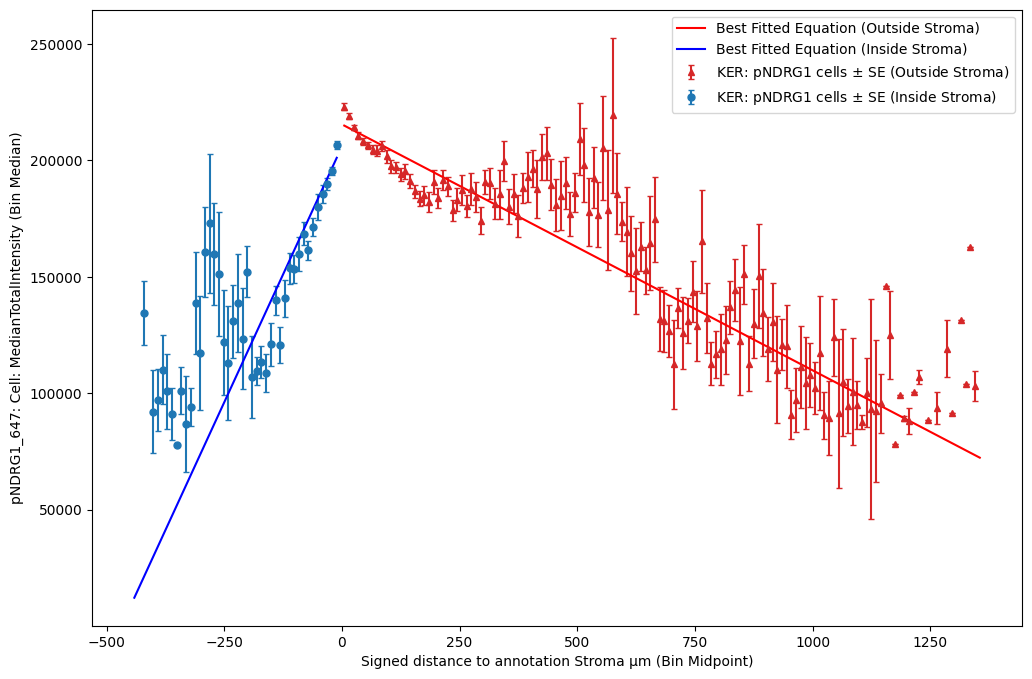

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

# Define function to calculate the standard error of the median using bootstrapping
def bootstrap_median(data, n_bootstrap=1000):
    medians = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))
    return np.median(medians), np.std(medians, ddof=1)

# Assuming ker488_pndrg1_647_data is your DataFrame containing the data
# Partition the data into two subsets based on the condition x > 0 and x < 0
positive_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] > 0]
negative_data = ker488_pndrg1_647_data[ker488_pndrg1_647_data['Signed distance to annotation Stroma µm'] < 0]

# Define bin size for both subsets
bin_size = 10
min_dist = int(np.min(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))
max_dist = int(np.max(ker488_pndrg1_647_data['Signed distance to annotation Stroma µm']))

# Create distance bins for positive and negative data separately
distance_bins_positive = pd.cut(positive_data['Signed distance to annotation Stroma µm'], bins=range(0, max_dist, bin_size), right=False)
distance_bins_negative = pd.cut(negative_data['Signed distance to annotation Stroma µm'], bins=range(min_dist, 0, bin_size), right=False)

# Bootstrap medians and calculate standard error for each distance bin for both subsets
median_bootstrap_std_error_positive = positive_data.groupby(distance_bins_positive)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)
median_bootstrap_std_error_negative = negative_data.groupby(distance_bins_negative)['pNDRG1_647: Cell: MedianTotalIntensity'].apply(bootstrap_median)

# Unpack the results to get median values and standard errors for both subsets
median_values_positive = median_bootstrap_std_error_positive.apply(lambda x: x[0])
std_error_positive = median_bootstrap_std_error_positive.apply(lambda x: x[1])

median_values_negative = median_bootstrap_std_error_negative.apply(lambda x: x[0])
std_error_negative = median_bootstrap_std_error_negative.apply(lambda x: x[1])

# Calculate number of data points for each distance bin for both subsets
num_data_points_positive = positive_data.groupby(distance_bins_positive).size()
num_data_points_negative = negative_data.groupby(distance_bins_negative).size()

# Calculate bin midpoints for both subsets
bin_midpoints_positive = [(bin.left + bin.right) / 2 for bin in distance_bins_positive.cat.categories]
bin_midpoints_negative = [(bin.left + bin.right) / 2 for bin in distance_bins_negative.cat.categories]

# Filter NaN values from median values and standard errors for both subsets
valid_indices_positive = ~np.isnan(median_values_positive)
X_filtered_positive = np.array(bin_midpoints_positive)[valid_indices_positive].reshape(-1, 1)
y_filtered_positive = median_values_positive[valid_indices_positive].values
#std_error_positive_filtered = std_error_positive[valid_indices_positive]
#std_error_positive_filtered_values = np.where(std_error_positive_filtered.values == 0, 500000, std_error_positive_filtered.values)
num_data_points_positive_filtered = num_data_points_positive[valid_indices_positive]


valid_indices_negative = ~np.isnan(median_values_negative)
X_filtered_negative = np.array(bin_midpoints_negative)[valid_indices_negative].reshape(-1, 1)
y_filtered_negative = median_values_negative[valid_indices_negative].values
#std_error_negative_filtered = std_error_negative[valid_indices_negative]
#std_error_negative_filtered_values = np.where(std_error_negative_filtered.values == 0, 500000, std_error_negative_filtered.values)
num_data_points_negative_filtered = num_data_points_negative[valid_indices_negative]


# Fit the models for both subsets using PySRRegressor with standard error as weights
model_positive = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

model_negative = PySRRegressor(
    niterations=100,  # < Increase me for better results
    binary_operators=["+", "*", "/"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    #elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    maxdepth=3
)

# Calculate weights based on filtered standard errors
#weights_positive = [1/w for w in std_error_positive_filtered_values/10]
#weights_negative = [1/w for w in std_error_negative_filtered_values/10]
weights_positive = num_data_points_positive_filtered
weights_negative = num_data_points_negative_filtered

# Fit the models for both subsets
model_positive.fit(X_filtered_positive, y_filtered_positive, weights=weights_positive) # , weights=1 / std_error_positive_filtered**2
model_negative.fit(X_filtered_negative, y_filtered_negative, weights=weights_negative) # , weights=1 / std_error_negative_filtered**2

plt.figure(figsize=(12, 8))

# Plotting the data for both subsets
plt.errorbar(bin_midpoints_positive, median_values_positive.values, yerr=std_error_positive, fmt='^', markersize=5, color='tab:red', ecolor='tab:red', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Outside Stroma)')
plt.errorbar(bin_midpoints_negative, median_values_negative.values, yerr=std_error_negative, fmt='o', markersize=5, color='tab:blue', ecolor='tab:blue', capsize=2, label=r'KER: pNDRG1 cells $\pm$ SE (Inside Stroma)')

# Plotting the best-fitted equations for both subsets
x_values_positive = np.linspace(min(bin_midpoints_positive), max(bin_midpoints_positive), 100)
y_values_positive = model_positive.predict(x_values_positive.reshape(-1, 1))
plt.plot(x_values_positive, y_values_positive, label='Best Fitted Equation (Outside Stroma)', color='red')

x_values_negative = np.linspace(min(bin_midpoints_negative), max(bin_midpoints_negative), 100)
y_values_negative = model_negative.predict(x_values_negative.reshape(-1, 1))
plt.plot(x_values_negative, y_values_negative, label='Best Fitted Equation (Inside Stroma)', color='blue')

# Add labels and legend
plt.xlabel('Signed distance to annotation Stroma µm (Bin Midpoint)')
plt.ylabel('pNDRG1_647: Cell: MedianTotalIntensity (Bin Median)')
plt.legend()

# Print the best equation for the positive subset
print("Best Equation (Positive):", model_positive.get_best())
# Print the best equation for the negative subset
print("Best Equation (Negative):", model_negative.get_best())

# Show plot
plt.savefig("/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/plots/spatial_analysis/20240314_plots/pySRfit_weighted_by_density_full_spatial_AScP_pNDRG1.png", dpi=300)
plt.show()